


#The implementation of different LSTM models including Encoder-Decoder based approaches for Rainfall-Runoff Modeling for Awash River in Ethiopia.


The data used to model the system are the streamflow, precipitation, temperature, wind speed, and humudity at different guaging stations in the upper Awash river basin. 28 years of daily recorded data is used. 

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


# Import Libraries

In [2]:
import pandas as pd
import datetime as dt  # Python standard library datetime  module
import matplotlib.pyplot as plt
import keras
from pandas import read_csv,concat,DataFrame,datetime
import numpy
import numpy as np
from numpy import concatenate

import math
from math import sqrt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,mean_squared_error,mean_absolute_error

from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.layers import BatchNormalization,Dense, Dropout, LSTM, GRU, TimeDistributed, Input, RNN,GRUCell,Lambda,Bidirectional,Concatenate,LSTMCell
from tensorflow.keras.models import Sequential,Model
from keras.callbacks import Callback
from tensorflow.keras import backend as K

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [3]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.9.2'

In [ ]:
tf.test.is_gpu_available()    #Tru if Gpu is avalible

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
!cat /proc/cpuinfo # Check the processing hardware

# Data preparation and processing

The Path below goes to my mounted GoogleDrive - It should be changed based on your GoogleDrive directory.

In [4]:
path= "/content/drive/MyDrive/1981_final/"

The Datasets were slightly modified before uploading them.   

1) Missing data was replaced by taking the average of previous 3 years on similar date of record. 



#Stream flow data for 3 stations 1) Berga station 2)Akaki Station 3) Hombole station (this is the target station to predict future streamflow)

In [5]:
sf_berga = pd.read_csv(path + 'berga.csv')
sf_akaki = pd.read_csv(path + 'Akaki.csv')
sf_hom = pd.read_csv(path + 'hombole.csv')

#Precipitation at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem  8) Boneya  9) Kimoye  10) Guranda 11) Ginchi

In [6]:
pcp_aa = pd.read_csv(path + 'pcp_aa.csv') # preciptation at addis ababa station
pcp_hom = pd.read_csv(path + 'pcp_hom.csv') # preciptation at hombole station
pcp_asgori = pd.read_csv(path + 'pcp_asgori.csv') # preciptation at asgori station
pcp_sendefa = pd.read_csv(path + 'pcp_sendefa.csv') # preciptation at sendefa station
pcp_tulubolo = pd.read_csv(path + 'pcp_tulubolo.csv') # preciptation at tulubolo station

pcp_sebeta = pd.read_csv(path + 'pcp_sebeta.csv') # preciptation at sebeta station
pcp_aalem = pd.read_csv(path + 'pcp_aalem.csv') # preciptation at addis alem station
pcp_boneya = pd.read_csv(path + 'pcp_boneya.csv') # preciptation at boneya station
pcp_kimoye = pd.read_csv(path + 'pcp_kimoye.csv') # preciptation at kimoye station
pcp_guranda = pd.read_csv(path + 'pcp_guranda.csv') # preciptation at guranda meta station

pcp_ginchi = pd.read_csv(path + 'pcp_ginchi.csv') # preciptation at ginchi station


#Average of (min and max) temprature at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sendefa 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [7]:
temp_aa = pd.read_csv(path + 'tmp_aa.csv') # temprature at addis ababa station
temp_hom = pd.read_csv(path + 'tmp_hom.csv') # preciptation at hombole station
temp_asgori = pd.read_csv(path + 'tmp_asgori.csv') # preciptation at asgori station
temp_sendefa = pd.read_csv(path + 'tmp_sendefa.csv') # preciptation at sendefa station
temp_tulubolo = pd.read_csv(path + 'tmp_tulubolo.csv') # preciptation at tulubolo station

temp_sebeta = pd.read_csv(path + 'tmp_sebeta.csv') # preciptation at sebeta station
temp_aalem = pd.read_csv(path + 'tmp_aalem.csv') # preciptation at addis alem station
temp_boneya = pd.read_csv(path + 'tmp_boneya.csv') # preciptation at boneya station
temp_kimoye = pd.read_csv(path + 'tmp_kimoye.csv') # preciptation at kimoye station
temp_guranda = pd.read_csv(path + 'tmp_guranda.csv') # preciptation at guranda meta station

temp_ginchi = pd.read_csv(path + 'tmp_ginchi.csv') # preciptation at ginchi station

#Humudity at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sendefa 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda  11) Ginchi

In [8]:
hmd_aa = pd.read_csv(path + 'hmd_aa.csv') # humudity at addis ababa station
hmd_hom = pd.read_csv(path + 'hmd_hom.csv') # preciptation at hombole station
hmd_asgori = pd.read_csv(path + 'hmd_asgori.csv') # preciptation at asgori station
hmd_sendefa = pd.read_csv(path + 'hmd_sendefa.csv') # preciptation at sendefa station
hmd_tulubolo = pd.read_csv(path + 'hmd_tulubolo.csv') # preciptation at tulubolo station

hmd_sebeta = pd.read_csv(path + 'hmd_sebeta.csv') # preciptation at sebeta station
hmd_aalem = pd.read_csv(path + 'hmd_aalem.csv') # preciptation at addis alem station
hmd_boneya = pd.read_csv(path + 'hmd_boneya.csv') # preciptation at boneya station
hmd_kimoye = pd.read_csv(path + 'hmd_kimoye.csv') # preciptation at kimoye station
hmd_guranda = pd.read_csv(path + 'hmd_guranda.csv') # preciptation at guranda meta station

hmd_ginchi = pd.read_csv(path + 'hmd_ginchi.csv') # preciptation at ginchi station

#Wind Speed at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sendefa 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda  11) Ginchi

In [9]:
wnd_aa = pd.read_csv(path + 'wnd_aa.csv') # wind speed at addis ababa station
wnd_hom = pd.read_csv(path + 'wnd_hom.csv') # preciptation at hombole station
wnd_asgori = pd.read_csv(path + 'wnd_asgori.csv') # preciptation at asgori station
wnd_sendefa = pd.read_csv(path + 'wnd_sendefa.csv') # preciptation at sendefa station
wnd_tulubolo = pd.read_csv(path + 'wnd_tulubolo.csv') # preciptation at tulubolo station

wnd_sebeta = pd.read_csv(path + 'wnd_sebeta.csv') # preciptation at sebeta station
wnd_aalem = pd.read_csv(path + 'wnd_aalem.csv') # preciptation at addis alem station
wnd_boneya = pd.read_csv(path + 'wnd_boneya.csv') # preciptation at boneya station
wnd_kimoye = pd.read_csv(path + 'wnd_kimoye.csv') # preciptation at kimoye station
wnd_guranda = pd.read_csv(path + 'wnd_guranda.csv') # preciptation at guranda meta station

wnd_ginchi = pd.read_csv(path + 'wnd_ginchi.csv') # preciptation at ginchi station

#Make date as index

In [10]:
## format datetime column
sf_hom["date"] = pd.to_datetime(sf_hom['date'])
sf_hom = sf_hom.set_index(['date'])
sf_berga["date"] = pd.to_datetime(sf_berga['date'])
sf_berga = sf_berga.set_index(['date'])
sf_akaki["date"] = pd.to_datetime(sf_akaki['date'])
sf_akaki = sf_akaki.set_index(['date'])

## format datetime column
pcp_aa["date"] = pd.to_datetime(pcp_aa['date'])
pcp_aa = pcp_aa.set_index(['date'])
pcp_hom["date"] = pd.to_datetime(pcp_hom['date'])
pcp_hom = pcp_hom.set_index(['date'])
pcp_asgori["date"] = pd.to_datetime(pcp_asgori['date'])
pcp_asgori = pcp_asgori.set_index(['date'])
pcp_sendefa["date"] = pd.to_datetime(pcp_sendefa['date'])
pcp_sendefa = pcp_sendefa.set_index(['date'])
pcp_tulubolo["date"] = pd.to_datetime(pcp_tulubolo['date'])
pcp_tulubolo = pcp_tulubolo.set_index(['date'])
pcp_sebeta["date"] = pd.to_datetime(pcp_sebeta['date'])
pcp_sebeta = pcp_sebeta.set_index(['date'])
pcp_aalem["date"] = pd.to_datetime(pcp_aalem['date'])
pcp_aalem = pcp_aalem.set_index(['date'])
pcp_boneya["date"] = pd.to_datetime(pcp_boneya['date'])
pcp_boneya = pcp_boneya.set_index(['date'])
pcp_kimoye["date"] = pd.to_datetime(pcp_kimoye['date'])
pcp_kimoye = pcp_kimoye.set_index(['date'])
pcp_guranda["date"] = pd.to_datetime(pcp_guranda['date'])
pcp_guranda = pcp_guranda.set_index(['date'])
pcp_ginchi["date"] = pd.to_datetime(pcp_ginchi['date'])
pcp_ginchi = pcp_ginchi.set_index(['date'])
## 
temp_aa["date"] = pd.to_datetime(temp_aa['date'])
temp_aa = temp_aa.set_index(['date'])
temp_hom["DATE"] = pd.to_datetime(temp_hom['DATE'])
temp_hom = temp_hom.set_index(['DATE'])
temp_asgori["date"] = pd.to_datetime(temp_asgori['date'])
temp_asgori = temp_asgori.set_index(['date'])
temp_sendefa["date"] = pd.to_datetime(temp_sendefa['date'])
temp_sendefa = temp_sendefa.set_index(['date'])
temp_tulubolo["date"] = pd.to_datetime(temp_tulubolo['date'])
temp_tulubolo = temp_tulubolo.set_index(['date'])
temp_sebeta["date"] = pd.to_datetime(temp_sebeta['date'])
temp_sebeta = temp_sebeta.set_index(['date'])
temp_aalem["date"] = pd.to_datetime(temp_aalem['date'])
temp_aalem = temp_aalem.set_index(['date'])
temp_boneya["date"] = pd.to_datetime(temp_boneya['date'])
temp_boneya = temp_boneya.set_index(['date'])
temp_kimoye["date"] = pd.to_datetime(temp_kimoye['date'])
temp_kimoye = temp_kimoye.set_index(['date'])
temp_guranda["date"] = pd.to_datetime(temp_guranda['date'])
temp_guranda = temp_guranda.set_index(['date'])
temp_ginchi["date"] = pd.to_datetime(temp_ginchi['date'])
temp_ginchi = temp_ginchi.set_index(['date'])
## 
hmd_aa["date"] = pd.to_datetime(hmd_aa['date'])
hmd_aa = hmd_aa.set_index(['date'])
hmd_hom["date"] = pd.to_datetime(hmd_hom['date'])
hmd_hom = hmd_hom.set_index(['date'])
hmd_asgori["date"] = pd.to_datetime(hmd_asgori['date'])
hmd_asgori = hmd_asgori.set_index(['date'])
hmd_sendefa["date"] = pd.to_datetime(hmd_sendefa['date'])
hmd_sendefa = hmd_sendefa.set_index(['date'])
hmd_tulubolo["date"] = pd.to_datetime(hmd_tulubolo['date'])
hmd_tulubolo = hmd_tulubolo.set_index(['date'])
hmd_sebeta["date"] = pd.to_datetime(hmd_sebeta['date'])
hmd_sebeta = hmd_sebeta.set_index(['date'])
hmd_aalem["date"] = pd.to_datetime(hmd_aalem['date'])
hmd_aalem = hmd_aalem.set_index(['date'])
hmd_boneya["date"] = pd.to_datetime(hmd_boneya['date'])
hmd_boneya = hmd_boneya.set_index(['date'])
hmd_kimoye["date"] = pd.to_datetime(hmd_kimoye['date'])
hmd_kimoye = hmd_kimoye.set_index(['date'])
hmd_guranda["date"] = pd.to_datetime(hmd_guranda['date'])
hmd_guranda = hmd_guranda.set_index(['date'])
hmd_ginchi["date"] = pd.to_datetime(hmd_ginchi['date'])
hmd_ginchi = hmd_ginchi.set_index(['date'])
## 
wnd_aa["date"] = pd.to_datetime(wnd_aa['date'])
wnd_aa = wnd_aa.set_index(['date'])
wnd_hom["date"] = pd.to_datetime(wnd_hom['date'])
wnd_hom = wnd_hom.set_index(['date'])
wnd_asgori["date"] = pd.to_datetime(wnd_asgori['date'])
wnd_asgori = wnd_asgori.set_index(['date'])
wnd_sendefa["date"] = pd.to_datetime(wnd_sendefa['date'])
wnd_sendefa = wnd_sendefa.set_index(['date'])
wnd_tulubolo["date"] = pd.to_datetime(wnd_tulubolo['date'])
wnd_tulubolo = wnd_tulubolo.set_index(['date'])
wnd_sebeta["date"] = pd.to_datetime(wnd_sebeta['date'])
wnd_sebeta = wnd_sebeta.set_index(['date'])
wnd_aalem["date"] = pd.to_datetime(wnd_aalem['date'])
wnd_aalem = wnd_aalem.set_index(['date'])
wnd_boneya["date"] = pd.to_datetime(wnd_boneya['date'])
wnd_boneya = wnd_boneya.set_index(['date'])
wnd_kimoye["date"] = pd.to_datetime(wnd_kimoye['date'])
wnd_kimoye = wnd_kimoye.set_index(['date'])
wnd_guranda["date"] = pd.to_datetime(wnd_guranda['date'])
wnd_guranda = wnd_guranda.set_index(['date'])
wnd_ginchi["date"] = pd.to_datetime(wnd_ginchi['date'])
wnd_ginchi = wnd_ginchi.set_index(['date'])

In [11]:
# print("Stream Flow description:\n", sf_hom.describe(), "\n")
# print("Precipitation description:\n", pcp_aa.describe(), "\n")

# print("Temperature description:\n", temp_aa.describe(), "\n")

# print("Humudity description:\n",hmd_aa.describe(), "\n")
# print("Wind speed description:\n",wnd_aa.describe(), "\n")

#Convert to floating point values 

In [12]:
sf_hom['streamflow']=sf_hom['streamflow'].astype(float)
sf_akaki['streamflow']=sf_akaki['streamflow'].astype(float)
sf_berga['streamflow']=sf_berga['streamflow'].astype(float)

pcp_aa['PCP']=pcp_aa['PCP'].astype(float)
pcp_hom['PCP']=pcp_hom['PCP'].astype(float)
pcp_asgori['PCP']=pcp_asgori['PCP'].astype(float)
pcp_sendefa['PCP']=pcp_sendefa['PCP'].astype(float)
pcp_tulubolo['PCP']=pcp_tulubolo['PCP'].astype(float)
pcp_sebeta['PCP']=pcp_sebeta['PCP'].astype(float)
pcp_aalem['PCP']=pcp_aalem['PCP'].astype(float)
pcp_boneya['PCP']=pcp_boneya['PCP'].astype(float)
pcp_kimoye['PCP']=pcp_kimoye['PCP'].astype(float)
pcp_guranda['PCP']=pcp_guranda['PCP'].astype(float)
pcp_ginchi['PCP']=pcp_ginchi['PCP'].astype(float)


temp_aa['avg_temp']=temp_aa['avg_temp'].astype(float)
temp_hom['avg_temp']=temp_hom['avg_temp'].astype(float)
temp_asgori['avg_temp']=temp_asgori['avg_temp'].astype(float)
temp_sendefa['avg_temp']=temp_sendefa['avg_temp'].astype(float)
temp_tulubolo['avg_temp']=temp_tulubolo['avg_temp'].astype(float)
temp_sebeta['avg_temp']=temp_sebeta['avg_temp'].astype(float)
temp_aalem['avg_temp']=temp_aalem['avg_temp'].astype(float)
temp_boneya['avg_temp']=temp_boneya['avg_temp'].astype(float)
temp_kimoye['avg_temp']=temp_kimoye['avg_temp'].astype(float)
temp_guranda['avg_temp']=temp_guranda['avg_temp'].astype(float)
temp_ginchi['avg_temp']=temp_ginchi['avg_temp'].astype(float)


hmd_aa['HMD']=hmd_aa['HMD'].astype(float)
hmd_hom['HMD']=hmd_hom['HMD'].astype(float)
hmd_asgori['HMD']=hmd_asgori['HMD'].astype(float)
hmd_sendefa['HMD']=hmd_sendefa['HMD'].astype(float)
hmd_tulubolo['HMD']=hmd_tulubolo['HMD'].astype(float)
hmd_sebeta['HMD']=hmd_sebeta['HMD'].astype(float)
hmd_aalem['HMD']=hmd_aalem['HMD'].astype(float)
hmd_boneya['HMD']=hmd_boneya['HMD'].astype(float)
hmd_kimoye['HMD']=hmd_kimoye['HMD'].astype(float)
hmd_guranda['HMD']=hmd_guranda['HMD'].astype(float)
hmd_ginchi['HMD']=hmd_ginchi['HMD'].astype(float)

wnd_aa['WND']=wnd_aa['WND'].astype(float)
wnd_hom['WND']=wnd_hom['WND'].astype(float)
wnd_asgori['WND']=wnd_asgori['WND'].astype(float)
wnd_sendefa['WND']=wnd_sendefa['WND'].astype(float)
wnd_tulubolo['WND']=wnd_tulubolo['WND'].astype(float)
wnd_sebeta['WND']=wnd_sebeta['WND'].astype(float)
wnd_aalem['WND']=wnd_aalem['WND'].astype(float)
wnd_boneya['WND']=wnd_boneya['WND'].astype(float)
wnd_kimoye['WND']=wnd_kimoye['WND'].astype(float)
wnd_guranda['WND']=wnd_guranda['WND'].astype(float)
wnd_ginchi['WND']=wnd_ginchi['WND'].astype(float)

#Stream flow plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7dd1759790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7dd1f8be50>)

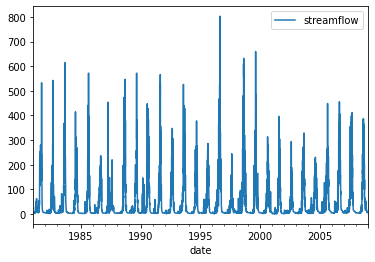

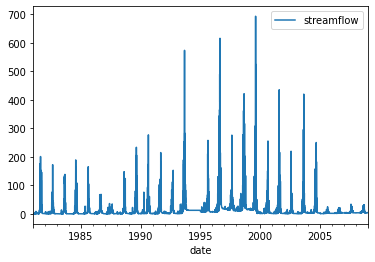

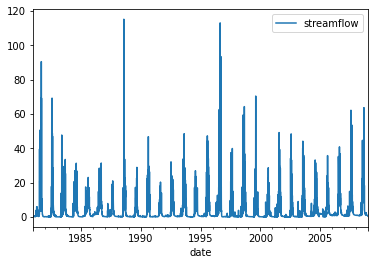

In [ ]:
sf_hom.plot(), sf_akaki.plot(), sf_berga.plot()

#Precipitation plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa35d00b1d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa348aa3650>)

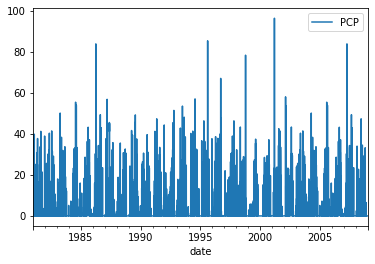

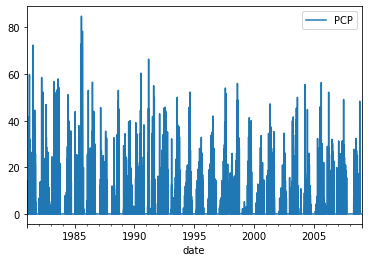

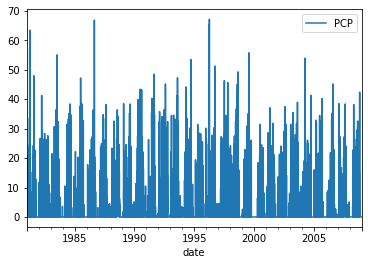

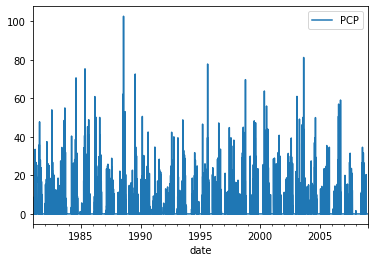

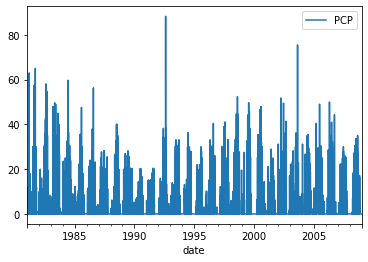

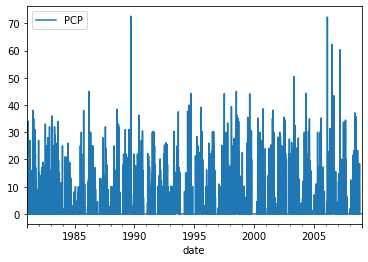

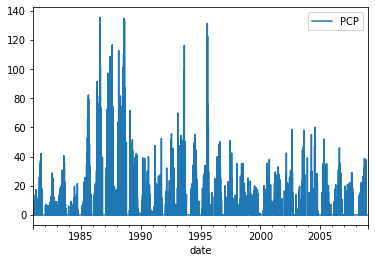

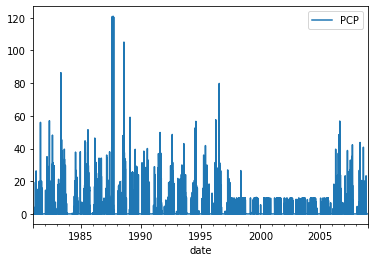

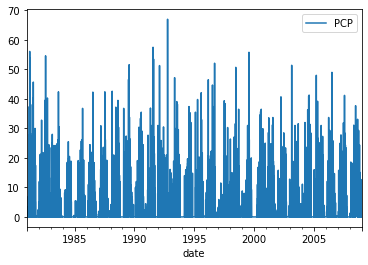

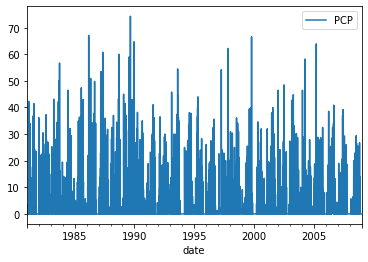

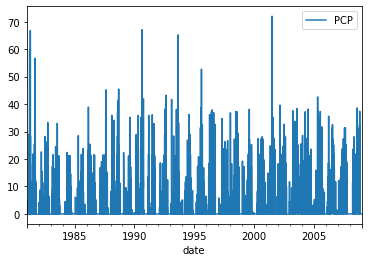

In [ ]:
pcp_aa.plot(), pcp_hom.plot(),pcp_asgori.plot(),pcp_sendefa.plot(),pcp_tulubolo.plot(),pcp_aalem.plot(), pcp_sebeta.plot(),pcp_boneya.plot(),pcp_kimoye.plot(),pcp_ginchi.plot(),pcp_guranda.plot()

#Temperature Plots

In [ ]:
temp_aa.plot(), temp_hom.plot(),temp_asgori.plot(),temp_sendefa.plot(),temp_tulubolo.plot(),temp_aalem.plot(), temp_sebeta.plot(),temp_boneya.plot(),temp_kimoye.plot(),temp_ginchi.plot(),temp_guranda.plot()

#Humudity Plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa35a2c7950>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa35a6c80d0>)

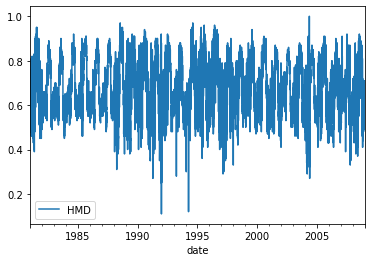

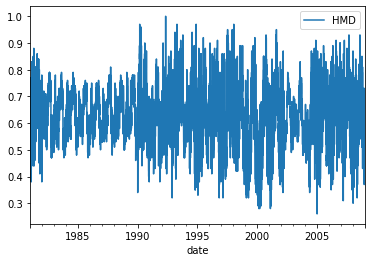

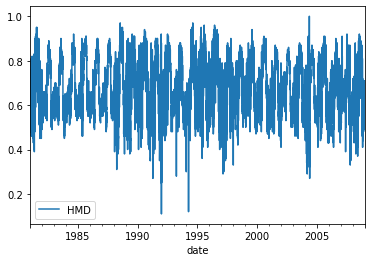

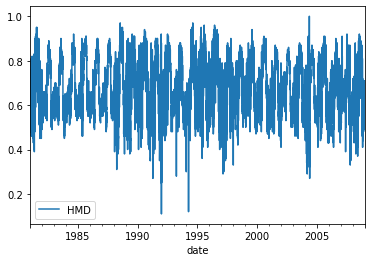

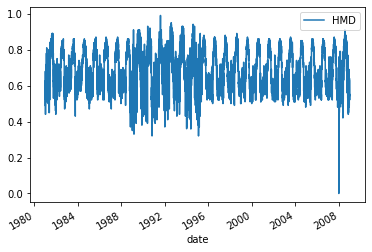

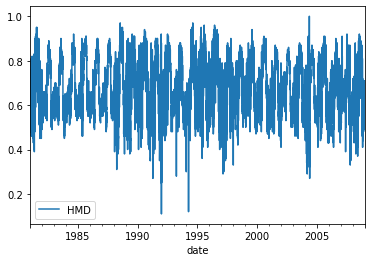

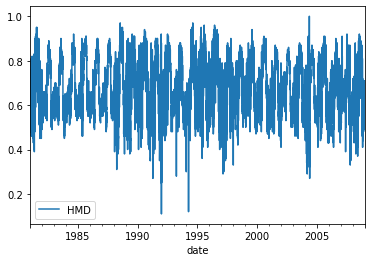

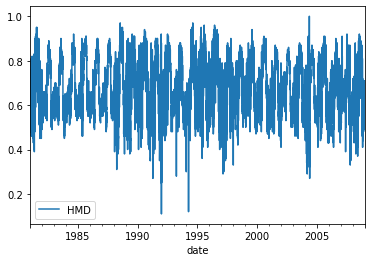

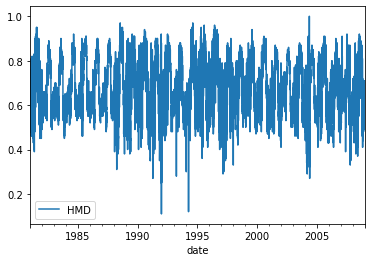

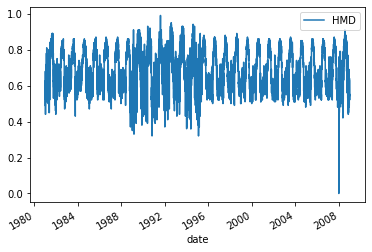

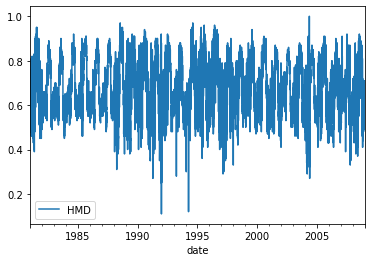

In [ ]:
hmd_aa.plot(), hmd_hom.plot(),hmd_asgori.plot(),hmd_sendefa.plot(),hmd_tulubolo.plot(),hmd_aalem.plot(), hmd_sebeta.plot(),hmd_boneya.plot(),hmd_kimoye.plot(),hmd_ginchi.plot(),hmd_guranda.plot()

#Wind speed plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa3f3320b50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa35d7d54d0>)

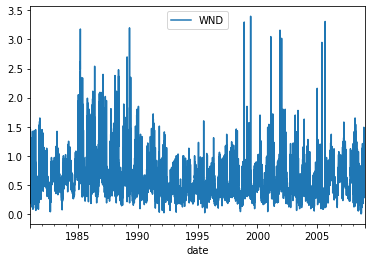

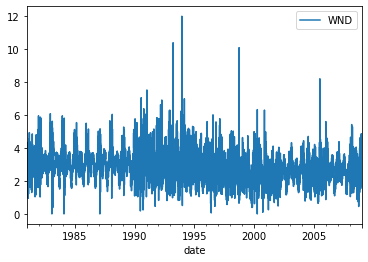

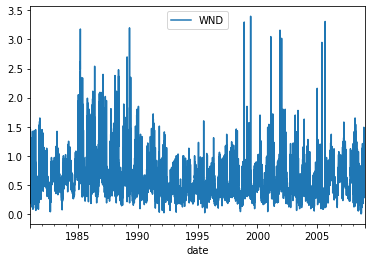

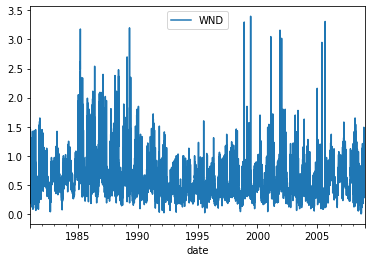

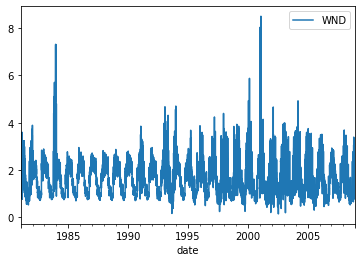

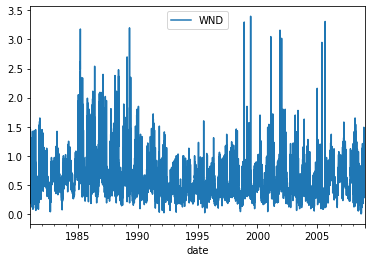

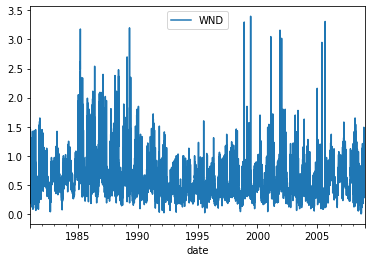

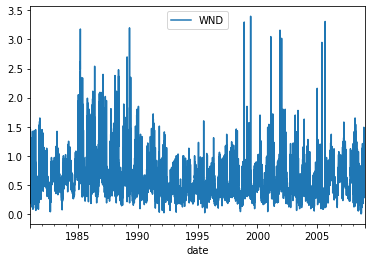

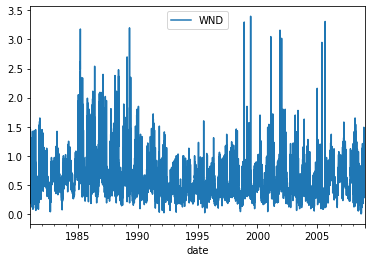

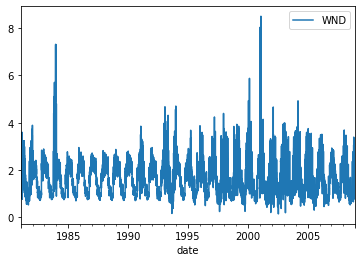

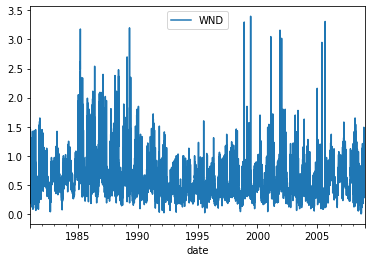

In [ ]:
wnd_aa.plot(),wnd_hom.plot(),wnd_asgori.plot(),wnd_sendefa.plot(),wnd_tulubolo.plot(),wnd_aalem.plot(), wnd_sebeta.plot(),wnd_boneya.plot(),wnd_kimoye.plot(),wnd_ginchi.plot(),wnd_guranda.plot()

#Resampled daily, weekly, monthly and yearly mean value for streamflow at target station

In [ ]:
sf_hom_D = sf_hom.resample('1D').mean()
sf_hom_W = sf_hom.resample('1W').mean()
sf_hom_M = sf_hom.resample('1M').mean()
sf_hom_Y = sf_hom.resample('1Y').mean()


sf_hom_D.plot(title="Discharge daily mean")
sf_hom_W.plot(title="Discharge weekly mean")
sf_hom_M.plot(title="Discharge monthly mean",figsize=(15,7))
sf_hom_Y.plot(title="Discharge yearly mean")

#Autocorrelation for streamflow at 3 different guaging stations

In [ ]:
pd.plotting.autocorrelation_plot(sf_hom['streamflow'])
#ax= pd.plotting.autocorrelation_plot(sf_hom['streamflow'])
#ax.set_xlim([0, 2000])
plt.title("Discharge daily mean")
plt.show()

pd.plotting.autocorrelation_plot(sf_akaki['streamflow'])
plt.title("Discharge weekly mean")
plt.show()

pd.plotting.autocorrelation_plot(sf_berga['streamflow'])
plt.title("Discharge monthly mean")
plt.show()

#from the graphs we can see that there is a corellation between the streamflows and their lags. But after 2000 days the correlation starts to decrease.
# The negative correlation between the time lags is mostly insignificant. This may be due to seasonality of the streamflow---meaning that in one
#season the streamflow may be high and on the next season it will be less 
# The plot also shows seasonality of the data 

In [ ]:
print(len(sf_akaki['streamflow']))
plot_acf(sf_akaki['streamflow'],lags=50)

plot_acf(sf_hom['streamflow'],lags=50)

plot_acf(sf_berga['streamflow'],lags=50)

#Autocorrelation for preciptation at 11 guaging stations 

In [ ]:
#pd.plotting.autocorrelation_plot(pcp_aa['PCP'])
plot_acf(pcp_aa['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_hom['PCP'])
plot_acf(pcp_hom['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_asgori['PCP'])
plot_acf(pcp_asgori['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_sendefa['PCP'])
plot_acf(pcp_sendefa['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_tulubolo['PCP'])
plot_acf(pcp_tulubolo['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_aalem['PCP'])
plot_acf(pcp_aalem['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_boneya['PCP'])
plot_acf(pcp_boneya['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_kimoye['PCP'])
plot_acf(pcp_kimoye['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_sebeta['PCP'])
plot_acf(pcp_sebeta['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_guranda['PCP'])
plot_acf(pcp_guranda['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_ginchi['PCP'])
plot_acf(pcp_ginchi['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#Autocorrelation for temperature at 11 guaging stations

In [ ]:
# pd.plotting.autocorrelation_plot(temp_aa['avg_temp'])
# plt.title("Temperature daily")
# plt.show()

#pd.plotting.autocorrelation_plot(temp_aa['avg_temp'])
plot_acf(temp_aa['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_hom['avg_temp'])
plot_acf(temp_hom['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_asgori['avg_temp'])
plot_acf(temp_asgori['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_sendefa['avg_temp'])
plot_acf(temp_sendefa['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_tulubolo['avg_temp'])
plot_acf(temp_tulubolo['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_aalem['avg_temp'])
plot_acf(temp_aalem['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_boneya['avg_temp'])
plot_acf(temp_boneya['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_kimoye['avg_temp'])
plot_acf(temp_kimoye['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_sebeta['avg_temp'])
plot_acf(temp_sebeta['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_guranda['avg_temp'])
plot_acf(temp_guranda['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_ginchi['avg_temp'])
plot_acf(temp_ginchi['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()


#Autocorrelation for Humudity at 11 guaging stations

In [ ]:
pd.plotting.autocorrelation_plot(hmd_tulubolo['HMD'])
plot_acf(hmd_tulubolo['HMD'],lags=100)
plt.title("humidity daily")
plt.show()

In [ ]:
#pd.plotting.autocorrelation_plot(hmd_ginchi['HMD'])
plot_acf(hmd_ginchi['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#the jumidity at ginchi station does not have any corelation and it is removed from our dataset since it will not help on prediction task.

In [ ]:
# pd.plotting.autocorrelation_plot(hmd_aa['HMD'])
# plt.title("humudirt daily")
# plt.show()

#pd.plotting.autocorrelation_plot(hmd_aa['HMD'])
plot_acf(hmd_aa['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_hom['HMD'])
plot_acf(hmd_hom['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_asgori['HMD'])
plot_acf(hmd_asgori['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_sendefa['HMD'])
plot_acf(hmd_sendefa['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_tulubolo['HMD'])
plot_acf(hmd_tulubolo['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_aalem['HMD'])
plot_acf(hmd_aalem['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_boneya['HMD'])
plot_acf(hmd_boneya['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_kimoye['HMD'])
plot_acf(hmd_kimoye['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_sebeta['HMD'])
plot_acf(hmd_sebeta['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_guranda['HMD'])
plot_acf(hmd_guranda['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_ginchi['HMD'])
plot_acf(hmd_ginchi['HMD'],lags=50)
plt.title("humidity daily")
plt.show()


#Autocorrelation for wind at 11 guaging stations

In [ ]:
# pd.plotting.autocorrelation_plot(wnd_aa['WND'])
# plt.title("wind daily")
# plt.show()

#pd.plotting.autocorrelation_plot(wnd_aa['WND'])
plot_acf(wnd_aa['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_hom['WND'])
plot_acf(wnd_hom['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_asgori['WND'])
plot_acf(wnd_asgori['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_sendefa['WND'])
plot_acf(wnd_sendefa['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_tulubolo['WND'])
plot_acf(wnd_tulubolo['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_aalem['WND'])
plot_acf(wnd_aalem['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_boneya['WND'])
plot_acf(wnd_boneya['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_kimoye['WND'])
plot_acf(wnd_kimoye['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_sebeta['WND'])
plot_acf(wnd_sebeta['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_guranda['WND'])
plot_acf(wnd_guranda['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_ginchi['WND'])
plot_acf(wnd_ginchi['WND'],lags=50)
plt.title("wind daily")
plt.show()


#Data Preparation for multivariate input(i.e preciptation,temp,hum,wind @ 11 guaging stations and lagged discharge @ 3 guaging stations) and single step output (streamflow at target guaging station) Encoder-Decoder MODEL

#Supervised data generating function

In [13]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#variable declaration

In [14]:
look_back = 10 #Number of time-steps/ time-lags (in days) to see in the past before predicting the current/future 
n_features = 47 #Temp (11 station), rain (@ 11 station), humudity (@ 11 stations), wind speed (@ 11 stations)
                # and discharge (@ 2 other stations and the target station which is hombole)


In [15]:
n_hours = look_back

#1. Training data preparation on year based slicing of pandas dataframe into trainig, validation and test, 20 years data used for training , 4 years data for validation and 4 years data for testing

#Dataframe holding multivariate training data

In [16]:
raw = DataFrame()
#Temperature features 
raw['temp_aa'] = temp_aa['avg_temp']
raw['temp_hom'] = temp_hom['avg_temp']
raw['temp_asgori'] = temp_asgori['avg_temp']
raw['temp_sendefa'] = temp_sendefa['avg_temp']
raw['temp_tulubolo'] = temp_tulubolo['avg_temp']
raw['temp_aalem'] = temp_aalem['avg_temp']
raw['temp_boneya'] = temp_boneya['avg_temp']
raw['temp_kimoye'] = temp_kimoye['avg_temp']
raw['temp_sebeta'] = temp_sebeta['avg_temp']
raw['temp_guranda'] = temp_guranda['avg_temp']
raw['temp_ginchi'] = temp_ginchi['avg_temp']
# #preciptation features
raw['rain_aa'] = pcp_aa['PCP']
raw['rain_hom'] = pcp_hom['PCP']
raw['rain_asgori'] = pcp_asgori['PCP']
raw['rain_sendefa'] = pcp_sendefa['PCP']
raw['rain_tulubolo'] = pcp_tulubolo['PCP']
raw['rain_aalem'] = pcp_aalem['PCP']
raw['rain_boneya'] = pcp_boneya['PCP']
raw['rain_kimoye'] = pcp_kimoye['PCP']
raw['rain_sebeta'] = pcp_sebeta['PCP']
raw['rain_guranda'] = pcp_guranda['PCP']
raw['rain_ginchi'] = pcp_ginchi['PCP']
# #Humudity features 
raw['hmd_aa'] = hmd_aa['HMD']
raw['hmd_hom'] = hmd_hom['HMD']
raw['hmd_asgori'] = hmd_asgori['HMD']
raw['hmd_sendefa'] = hmd_sendefa['HMD']
raw['hmd_tulubolo'] = hmd_tulubolo['HMD']
raw['hmd_aalem'] = hmd_aalem['HMD']
raw['hmd_boneya'] = hmd_boneya['HMD']
raw['hmd_kimoye'] = hmd_kimoye['HMD']
raw['hmd_sebeta'] = hmd_sebeta['HMD']
raw['hmd_guranda'] = hmd_guranda['HMD']
raw['hmd_ginchi'] = hmd_ginchi['HMD']

# #Wind features 
raw['wnd_aa'] = wnd_aa['WND']
raw['wnd_hom'] = wnd_hom['WND']
raw['wnd_asgori'] = wnd_asgori['WND']
raw['wnd_sendefa'] = wnd_sendefa['WND']
raw['wnd_tulubolo'] = wnd_tulubolo['WND']
raw['wnd_aalem'] = wnd_aalem['WND']
raw['wnd_boneya'] = wnd_boneya['WND']
raw['wnd_kimoye'] = wnd_kimoye['WND']
raw['wnd_sebeta'] = wnd_sebeta['WND']
raw['wnd_guranda'] = wnd_guranda['WND']
raw['wnd_ginchi'] = wnd_ginchi['WND']

#Streamflow features
raw['Q_akaki'] = sf_akaki['streamflow']
raw['Q_berga'] = sf_berga['streamflow']
raw['Q_hom'] = sf_hom['streamflow']
  

#Training data partition

In [17]:
raw_train= raw.loc['1981-01-01':'2000-12-31']
values_train = raw_train.values

#Validation data partition

In [18]:
raw_val = raw.loc['2001-01-01':'2004-12-31']
values_val = raw_val.values

#Test data partition

In [19]:
raw_test = raw.loc['2005-01-01':'2008-12-31']
values_test = raw_test.values

#Generating Supervised data for train, valid and test

In [20]:
sup_train = series_to_supervised(values_train, n_hours, 1) 

print(sup_train.shape)

(7295, 517)


In [21]:
sup_val = series_to_supervised(values_val, n_hours, 1) 

print(sup_val.shape)

(1451, 517)


In [22]:
sup_test = series_to_supervised(values_test, n_hours, 1) 

print(sup_test.shape)

(1451, 517)


#You can use either of the following 2 drop column approaches to re-format your training dataset. But not both at the same time

#a) Drop columuns at the beginning of the dataframe (i.e the first supervised data sample) to make the data in the form of previous (t-n-1, ....t) for the pcp, temp,hmd,wnd,and two other stream flows and (t-n, t-n-1, ....t-1) for the lagged target station streamflow data.

In [ ]:
sup_train.drop(sup_train.iloc[:,0:46], axis=1, inplace=True)
sup_train

In [ ]:
sup_val.drop(sup_val.iloc[:,0:46], axis=1, inplace=True)
sup_val

In [ ]:
sup_test.drop(sup_test.iloc[:,0:46], axis=1, inplace=True)
sup_test

In [ ]:
sup_test.shape

(1451, 517)

#b) Drop the columuns for pcp, temp,hmd,wnd at all stations and two other stream flow data at the end of the dataframe to make the model input features at (t-n, t-n-1, .....t-1) for all features including the target streamflow.

In [ ]:
sup_train.drop(sup_train.iloc[:,470:516], axis=1, inplace=True)
sup_train

In [ ]:
sup_val.drop(sup_val.iloc[:,470:516], axis=1, inplace=True)
sup_val

In [ ]:
sup_test.drop(sup_test.iloc[:,470:516], axis=1, inplace=True)
sup_test

#Train, validation and Test split

In [26]:
train = sup_train.values
val = sup_val.values
test = sup_test.values

In [27]:
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
val_X, val_y = val[:, :n_obs], val[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
print(test_X.shape, len(test_X), test_y.shape)
print(val_X.shape, len(val_X), val_y.shape)

(7295, 470) 7295 (7295,)
(1451, 470) 1451 (1451,)
(1451, 470) 1451 (1451,)


#2. Training data prepartion by randomly classifying the whole data into train, validation and test 

#Dataframe holding multivariate training data and scaling the training dataset in the range 0 to 1.

In [ ]:
raw = DataFrame()
#Temperature features 
raw['temp_aa'] = temp_aa['avg_temp']
raw['temp_hom'] = temp_hom['avg_temp']
raw['temp_asgori'] = temp_asgori['avg_temp']
raw['temp_sendefa'] = temp_sendefa['avg_temp']
raw['temp_tulubolo'] = temp_tulubolo['avg_temp']
raw['temp_aalem'] = temp_aalem['avg_temp']
raw['temp_boneya'] = temp_boneya['avg_temp']
raw['temp_kimoye'] = temp_kimoye['avg_temp']
raw['temp_sebeta'] = temp_sebeta['avg_temp']
raw['temp_guranda'] = temp_guranda['avg_temp']
raw['temp_ginchi'] = temp_ginchi['avg_temp']

# #preciptation features
raw['rain_aa'] = pcp_aa['PCP']
raw['rain_hom'] = pcp_hom['PCP']
raw['rain_asgori'] = pcp_asgori['PCP']
raw['rain_sendefa'] = pcp_sendefa['PCP']
raw['rain_tulubolo'] = pcp_tulubolo['PCP']
raw['rain_aalem'] = pcp_aalem['PCP']
raw['rain_boneya'] = pcp_boneya['PCP']
raw['rain_kimoye'] = pcp_kimoye['PCP']
raw['rain_sebeta'] = pcp_sebeta['PCP']
raw['rain_guranda'] = pcp_guranda['PCP']
raw['rain_ginchi'] = pcp_ginchi['PCP']
# #Humudity features 
raw['hmd_aa'] = hmd_aa['HMD']
raw['hmd_hom'] = hmd_hom['HMD']
raw['hmd_asgori'] = hmd_asgori['HMD']
raw['hmd_sendefa'] = hmd_sendefa['HMD']
raw['hmd_tulubolo'] = hmd_tulubolo['HMD']
raw['hmd_aalem'] = hmd_aalem['HMD']
raw['hmd_boneya'] = hmd_boneya['HMD']
raw['hmd_kimoye'] = hmd_kimoye['HMD']
raw['hmd_sebeta'] = hmd_sebeta['HMD']
raw['hmd_guranda'] = hmd_guranda['HMD']
raw['hmd_ginchi'] = hmd_ginchi['HMD']

# #Wind features 
raw['wnd_aa'] = wnd_aa['WND']
raw['wnd_hom'] = wnd_hom['WND']
raw['wnd_asgori'] = wnd_asgori['WND']
raw['wnd_sendefa'] = wnd_sendefa['WND']
raw['wnd_tulubolo'] = wnd_tulubolo['WND']
raw['wnd_aalem'] = wnd_aalem['WND']
raw['wnd_boneya'] = wnd_boneya['WND']
raw['wnd_kimoye'] = wnd_kimoye['WND']
raw['wnd_sebeta'] = wnd_sebeta['WND']
raw['wnd_guranda'] = wnd_guranda['WND']
raw['wnd_ginchi'] = wnd_ginchi['WND']

#Streamflow features
raw['Q_akaki'] = sf_akaki['streamflow']
raw['Q_berga'] = sf_berga['streamflow']
raw['Q_hom'] = sf_hom['streamflow']
  

values2 = raw.values
 

#Generate supervised data

In [ ]:
reframed = series_to_supervised(values2, n_hours, 1) 

print(reframed.shape)

(10217, 517)


#Use either of (a or b) (but not both at same time) drop column approaches for re-formatting your training data

#a) Drop columuns at the beginning of the dataframe (i.e the first supervised data sample) to make the data in the form of previous (t-n-1, ....t) for the pcp, temp,hmd,wnd,and two other stream flows and (t-n, t-n-1, ....t-1) for the lagged target station streamflow data.

In [ ]:
reframed.drop(reframed.iloc[:,0:46], axis=1, inplace=True)
reframed

#b) Drop the columuns for pcp, temp,hmd,wnd at all stations and two other stream flow data at the end of the dataframe to make the data at (t-n, t-n-1, .....t-1) for all features including the target streamflow.

In [ ]:
reframed.drop(reframed.iloc[:,470:516], axis=1, inplace=True)
reframed

#Train, Validation and Test split

In [ ]:
values_2 = reframed.values
TRAIN_SIZE = 0.8 # this value can be changed based on your problem and data analysis
n_train = int(len(values_2) * TRAIN_SIZE) 
train = values_2[:n_train, :]
eval = values_2[n_train:, :]

In [ ]:
TEST_SIZE = 0.5 # this value can be changed based on your problem and data analysis
n_val= int(len(eval) * TEST_SIZE) 
val = eval[:n_val, :]
test = eval[n_val:, :]

In [ ]:
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
val_X, val_y = val[:, :n_obs], val[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
print(test_X.shape, len(test_X), test_y.shape)
print(val_X.shape, len(val_X), val_y.shape)

(8173, 470) 8173 (8173,)
(1022, 470) 1022 (1022,)
(1022, 470) 1022 (1022,)


#Feature scaling (the next part of code will work for both approaches described above as 1) and 2) )

In [28]:
# feature scaling
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train = scaler_X.fit_transform(train_X)

scaler_Y = MinMaxScaler(feature_range=(0, 1))
Y_train = scaler_Y.fit_transform(train_y.reshape(-1,1))

In [29]:
X_test = scaler_X.transform(test_X)
Y_test = scaler_Y.transform(test_y.reshape(-1,1))

X_val = scaler_X.transform(val_X)
Y_val = scaler_Y.transform(val_y.reshape(-1,1))

#Reshaping train, validation and test data into 3D shape since LSTM takes as input a data in the format (samples, time-step, sample_features)

In [30]:
train_X2 = X_train.reshape((X_train.shape[0], n_hours, n_features))
test_X2 = X_test.reshape((X_test.shape[0], n_hours, n_features))
val_X2 = X_val.reshape((X_val.shape[0], n_hours, n_features))
print(train_X2.shape, test_X2.shape, val_X2.shape)

(7295, 10, 47) (1451, 10, 47) (1451, 10, 47)


In [31]:
train_y2 = Y_train.reshape((Y_train.shape[0], 1, 1))
test_y2 = Y_test.reshape((Y_test.shape[0], 1, 1))
val_y2 = Y_val.reshape((Y_val.shape[0], 1, 1))
print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape,val_X2.shape, val_y2.shape)

(7295, 10, 47) (7295, 1, 1) (1451, 10, 47) (1451, 1, 1) (1451, 10, 47) (1451, 1, 1)


#1. Encoder-Decoder Model Setup.  In this part a stacked encoder-decoder model is developed by feeding the decoder a zero input at the single time step. A single step prediction model is developed where the length of decoder output sequence is one. I have used stacked LSTM/GRU cells.

In [32]:
keras.backend.clear_session()

layers = [100, 100] # Number of hidden neuros in each layer of the encoder and decoder

learning_rate = 0.001
decay = 0 # Learning rate decay
optimiser = tf.keras.optimizers.Adam(lr=learning_rate, decay=decay) # Other possible optimiser "sgd" (Stochastic Gradient Descent)

num_input_features = 47 # The dimensionality of the input at each time step. In this case a 1D signal.
num_output_features = 1 # The dimensionality of the output at each time step. In this case a 1D signal.

loss = "mse" # Other loss functions are possible, see Keras documentation.

# Regularisation isn't really needed for this application
lambda_regulariser = 0.000001 # Will not be used if regulariser is None
regulariser = None # Possible regulariser: keras.regularizers.l2(lambda_regulariser)

batch_size = 512
steps_per_epoch = 200 # batch_size * steps_per_epoch = total number of training examples
epochs = 15

input_sequence_length = 10 # Length of the sequence used by the encoder
target_sequence_length = 1 # Length of the sequence predicted by the decoder
num_steps_to_predict = 20 # Length to use when testing the model



/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#In the folowwing cells single layer LSTM and GRU are used both at the Encoder and Decoder.

In [35]:
LSTMoutputDimension = 100

In [63]:
encoder_inputs= Input(shape=(input_sequence_length, num_input_features))
encoder_lstm=LSTM(LSTMoutputDimension, return_state=True)
#encoder_lstm=GRU(LSTMoutputDimension, return_state=True)
LSTM_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
#LSTM_outputs, state_h = encoder_lstm(encoder_inputs)

encoder_states = [state_h,state_c]
#encoder_states = [state_h]

decoder_inputs = Input(shape=(None, num_output_features), name='decoder_inputs')
decoder_lstm = LSTM(LSTMoutputDimension, return_sequences=True, return_state=True, name='decoder_lstm')
#decoder_lstm = GRU(LSTMoutputDimension, return_sequences=True, return_state=True, name='decoder_lstm')

decoder_outputs, _,_ = decoder_lstm(decoder_inputs, initial_state=encoder_states) # For the case of LSTM based architecture we have 3 outputs
#decoder_outputs, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states) # For the case of GRU based architecture we have 2 outputs

# dropout = Dropout(rate=0.25)
# decoder_outputs = dropout(decoder_outputs)

decoder_dense = Dense(num_output_features, activation='linear', name='decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)


#In the following cells Stacked (2 layer) LSTM/GRU architectures are used both at the Encoder and Decoder. Here the input for the decoder is zero or -1. 

In [63]:
# The Encoder
encoder_inputs = keras.layers.Input(shape=(None, num_input_features))

encoder_cells = []
for hidden_neurons in layers:
    #Stacked GRU
    encoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))
    #Stacked LSTM
    # encoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
    #                                           kernel_regularizer=regulariser,
    #                                           recurrent_regularizer=regulariser,
    #                                           bias_regularizer=regulariser))

encoder = keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

encoder_states = encoder_outputs_and_states[1:]

#Decoder

In [64]:
# The decoder 
decoder_inputs = keras.layers.Input(shape=(None, num_output_features))

decoder_cells = []
for hidden_neurons in layers:
    #Stacked GRU
    decoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))
    #Stacked LSTM
    # decoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
    #                                           kernel_regularizer=regulariser,
    #                                           recurrent_regularizer=regulariser,
    #                                           bias_regularizer=regulariser))

decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)


decoder_outputs = decoder_outputs_and_states[0]

# dropout = Dropout(rate=0.25)
# decoder_outputs = dropout(decoder_outputs)

decoder_dense = keras.layers.Dense(num_output_features,
                                   activation='linear',
                                   kernel_regularizer=regulariser,
                                   bias_regularizer=regulariser)

decoder_outputs = decoder_dense(decoder_outputs)

#In the following cells an Encoder-Decoder impelementation using Bidirectional LSTM is demonstrated. The input to the decoder is zero/-1.

In [94]:
# The encoder
encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')

#encoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
encoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
#encoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = encoder_lstm1(encoder_inputs) # For LSTM based
encoder_lstm1_output,forward_h1,backward_h1= encoder_lstm1(encoder_inputs) # For GRU based

#encoder_lstm2 = Bidirectional(LSTM(100,return_state=True))
encoder_lstm2 = Bidirectional(GRU(100,return_state=True))
#encoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = encoder_lstm2(encoder_lstm1_output)
encoder_lstm2_output,forward_h2,backward_h2= encoder_lstm2(encoder_lstm1_output)


#states = [forward_h2,forward_c2,backward_h2,backward_c2]
states = [forward_h2,backward_h2]



#The Decoder part 
decoder_inputs = keras.layers.Input(shape=(None, 1))


#decoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
decoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
#decoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = decoder_lstm1(decoder_inputs,initial_state=states)
decoder_lstm1_output,forward_h1,backward_h1 = decoder_lstm1(decoder_inputs,initial_state=states)

#decoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
#decoder_lstm2 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
#decoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = decoder_lstm2(decoder_lstm1_output)
#decoder_lstm2_output,forward_h2,backward_h2 = decoder_lstm2(decoder_lstm1_output)

decoder_outputs = decoder_lstm1_output

# dropout = Dropout(rate=0.25)
# decoder_outputs = dropout(decoder_outputs)

decoder_dense = keras.layers.Dense(num_output_features,
                                  activation='linear',
                                  kernel_regularizer=regulariser,
                                  bias_regularizer=regulariser)


decoder_outputs = decoder_dense(decoder_outputs)


#These are the decoder input values which are set as zero. Since the decoder has sequence length of one and the input feature is only the streamflow data the the feature size is also one. Thus the shape of the decoder input will be (samples, 1,1)

#a) By using Zero

In [36]:
train_decoder_input_data = np.zeros((7295,  1, num_output_features))

In [37]:
val_decoder_input_data = np.zeros((1451,  1, num_output_features))

In [38]:
test_decoder_input_data = np.zeros((1451,  1, num_output_features))

# b) By using -1

In [ ]:
train_decoder_input_data2 = np.ones((7295,  1, 1))
train_decoder_input_data2= np.negative(train_decoder_input_data2)
val_decoder_input_data2 = np.ones((1451,  1, 1))
val_decoder_input_data2 = np.negative(val_decoder_input_data2)
test_decoder_input_data2 = np.ones((1451,  1, 1))
test_decoder_input_data2 = np.negative(test_decoder_input_data2)

#Model Training

In [95]:
model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
#model.summary()
model.compile(optimizer=optimiser, loss=loss)

In [96]:
history2 = model.fit([train_X2,train_decoder_input_data], train_y2, epochs=50, batch_size=100, validation_data=([val_X2,val_decoder_input_data], val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 13s 44ms/step - loss: 0.0495 - val_loss: 0.0019
Epoch 2/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0026 - val_loss: 9.2326e-04
Epoch 3/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0017 - val_loss: 8.0261e-04
Epoch 4/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 8.1749e-04
Epoch 5/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0014 - val_loss: 7.5460e-04
Epoch 6/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0014 - val_loss: 6.7418e-04
Epoch 7/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0014 - val_loss: 6.2158e-04
Epoch 8/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0013 - val_loss: 6.0427e-04
Epoch 9/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0013 - val_loss: 5.9640e-04
Epoch 10/50
73/73 [==============================] - 1s 16ms/step - loss: 0.

#Loss graph

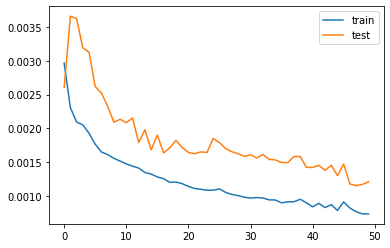

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction result on test dataset

In [97]:
y_test_predicted = model.predict([test_X2,test_decoder_input_data])
pred= tf.reshape(y_test_predicted, [1451, 1])
orig=tf.reshape(test_y2, [1451, 1])

inv_yhat2 = scaler_Y.inverse_transform(pred)
inv_y2 = scaler_Y.inverse_transform(orig)

46/46 [==============================] - 2s 6ms/step


#RMSE value of the model

In [98]:
rmse2 = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Test RMSE: %.4f' % rmse2)

Test RMSE: 25.2911


In [101]:
# mae of zero means there is no error or the predicted value perfectly fits the original data
mae= mean_absolute_error(inv_y2, inv_yhat2)
print('Test mae: %.4f' % mae)

Test mae: 14.2878


In [102]:
nse = 1-(np.sum(np.power((inv_y2-inv_yhat2),2))/np.sum(np.power((inv_y2-inv_y2.mean()),2)))
print('Test NSE: %.4f' % nse)

Test NSE: 0.9150


#Ploting prediction result Vs actual value

inv_y2 (OBS) max: 455.706  versus inv_yhat2 (SIM) max: 280.4272034946084


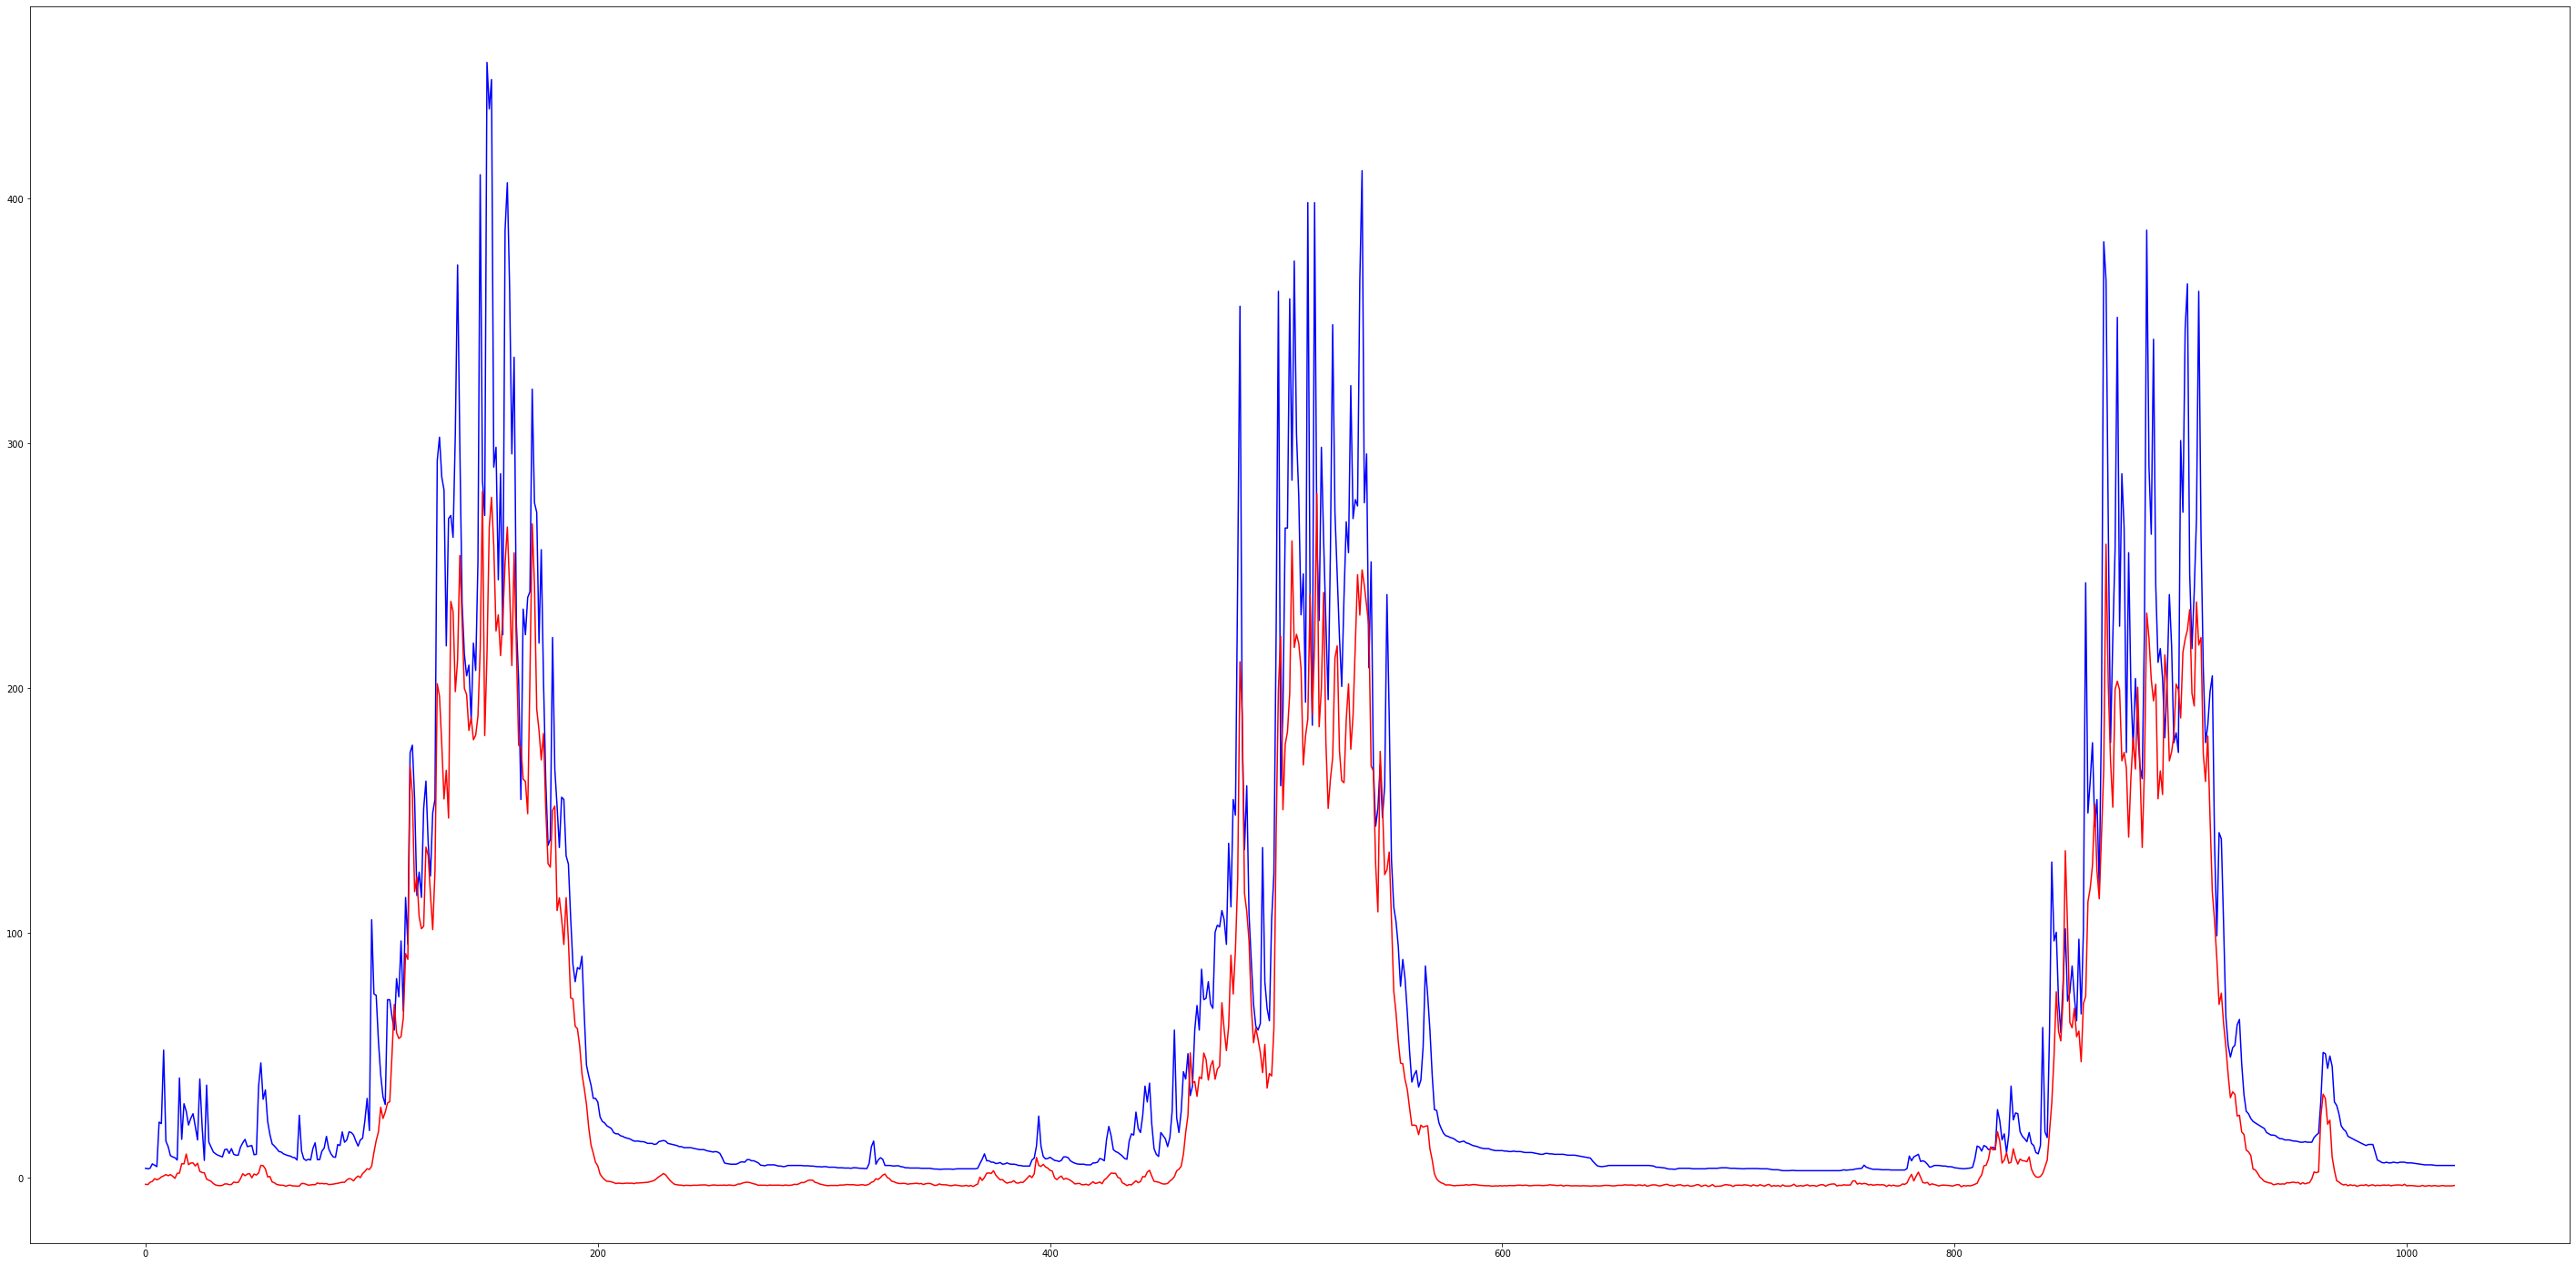

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat))
plt.figure(figsize=(50,25))
plt.plot(inv_y, color='blue')
plt.plot(inv_yhat,color='red')
plt.show()

#2. In this part an encoder-decoder model for multivariate single step prediction is developed but this time the decoder input will be the last encoder output after being fed to a dense layer.Single layer LSTM/GRU is used rather than stacked LSTM/GRU cells.

In [103]:
LSTMoutputDimension = 100

In [141]:
encoder_inputs= Input(shape=(input_sequence_length, num_input_features))
#encoder_lstm=LSTM(LSTMoutputDimension, return_state=True)
encoder_lstm=GRU(LSTMoutputDimension, return_state=True)
#encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_outputs, state_h = encoder_lstm(encoder_inputs)


encoder_output_densed = Dense(num_output_features,  name='encoder_dense')(encoder_outputs)
decoder_input_data = tf.expand_dims(encoder_output_densed, axis=1)

#encoder_states = [state_h,state_c]
encoder_states = [state_h]

decoder_inputs = Input(shape=(None, num_output_features), name='decoder_inputs')
#decoder_lstm = LSTM(LSTMoutputDimension, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_lstm = GRU(LSTMoutputDimension, return_sequences=True, return_state=True, name='decoder_lstm')

#decoder_outputs, _,_ = decoder_lstm(decoder_input_data, initial_state=encoder_states) # For the case of LSTM based architecture we have 3 outputs
decoder_outputs, _ = decoder_lstm(decoder_input_data, initial_state=encoder_states) # For the case of GRU based architecture we have 2 outputs

# dropout = Dropout(rate=0.25)
# decoder_outputs = dropout(decoder_outputs)

decoder_dense = Dense(num_output_features, activation='linear', name='decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)

In [142]:
model = keras.models.Model(encoder_inputs, decoder_outputs, name= 'model_encode_decoder')
#model.summary()
model.compile(optimizer=optimiser, loss=loss)

#This function is used to create a stacked LSTM/GRU cells using Keras RNN layer.

In [169]:
def _create_stacked_rnn_cells():
    """
   Create a `layers_stacked_count` amount of GRU cells and stack them on top of each other.
   They have a `hidden_dim` number of neuron layer size.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
    :return: list of gru cells
    """
    cells = []
    for _ in range(2): # modifiy this one
        #cells.append(GRUCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
        cells.append(LSTMCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
    
    return cells

In [179]:
def create_hard_coded_decoder_input_model(batch_size):
  #Encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')
  encoder_lstm = RNN(cell=_create_stacked_rnn_cells(), return_sequences=False, return_state=True)
  #encoder_lstm = LSTM(32, return_state=True,  name='encoder_lstm')
  encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)

  #Dense layer is used to change the encoder output shape to (samples, output-squence-length, num-out-features ). The following 2 lines of code will do that
  
  encoder_output_densed = Dense(num_output_features,  name='encoder_dense')(encoder_outputs)
  decoder_input_data = tf.expand_dims(encoder_output_densed, axis=1)
  
  # initial context vector is the states of the encoder
  states = [state_h, state_c]
  decoder_inputs = Input(shape=(1, num_output_features))
  
  decoder_lstm = RNN(cell=_create_stacked_rnn_cells(), return_sequences=True, return_state=True)
  #decoder_lstm = LSTM(32, return_sequences=True, return_state=True, name='decoder_lstm')
  
  decoder_dense = Dense(num_output_features,  name='decoder_dense')
  
  all_outputs = []
  
  inputs = decoder_input_data

  sequence_length = 1
  for _ in range(sequence_length):
      # Run the decoder on one time step
      
      outputs, state_h, state_c = decoder_lstm(inputs, initial_state=states)
      
      # dropout = Dropout(rate=0.25)
      # outputs = dropout(outputs)

      outputs = decoder_dense(outputs)
      all_outputs.append(outputs)
      # Use previous decoder outputs as inputs for the next time step of decoder 
      inputs = outputs
      states = [state_h, state_c]
      

  # Concatenate all outputs
  decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)
  
  
  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss=loss)
  return model

In [180]:
model=create_hard_coded_decoder_input_model(batch_size=batch_size)
#model.summary()

#In the following cells an Encoder-Decoder impelementation using Bidirectional LSTM/GRU is demonstrated. The input to the decoder is last encoder output after being densed.

In [209]:
def create_hard_coded_decoder_input_model(batch_size):
  # The encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')

  #encoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
  encoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  #encoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = encoder_lstm1(encoder_inputs) # For LSTM based
  encoder_lstm1_output,forward_h1,backward_h1= encoder_lstm1(encoder_inputs) # For GRU based

  #encoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=False))
  encoder_lstm2 = Bidirectional(GRU(100,return_state=True,return_sequences=False))
  #encoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = encoder_lstm2(encoder_lstm1_output)
  encoder_lstm2_output,forward_h2,backward_h2= encoder_lstm2(encoder_lstm1_output)

  encoder_output_densed = Dense(num_output_features,  name='encoder_dense')(encoder_lstm2_output)
  

  decoder_input_data = tf.expand_dims(encoder_output_densed, axis=1)
  
  #states = [forward_h2,forward_c2,backward_h2,backward_c2]
  states = [forward_h2,backward_h2]

  #The Decoder part 
  decoder_inputs=Input(shape=(1, num_input_features), name='encoder_inputs')


  decoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  #decoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))


  decoder_dense = Dense(num_output_features, activation='linear',  kernel_regularizer=regulariser, bias_regularizer=regulariser, name='decoder_dense')

  all_outputs = []
  inputs = decoder_input_data

  sequence_length = 1
  for _ in range(sequence_length):
      
      outputs, forward_state_h, backward_state_h = decoder_lstm1(inputs, initial_state=states)
      #outputs, forward_h,forward_c,backward_h,backward_c = decoder_lstm1(inputs, initial_state=states)
      
      # dropout = Dropout(rate=0.25)
      # outputs = dropout(outputs)

      outputs = decoder_dense(outputs)
      all_outputs.append(outputs)
      inputs = outputs
      states = [forward_state_h, backward_state_h]
      #states = [forward_h,forward_c,backward_h,backward_c]
      

  decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)

  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
  return model


In [ ]:
model=create_hard_coded_decoder_input_model(batch_size=batch_size)
#model.summary()

#Train the model

In [210]:
history2 = model.fit(train_X2, train_y2, epochs=50, batch_size=100, validation_data=(val_X2, val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 4s 49ms/step - loss: 2.2629e-04 - val_loss: 6.1606e-04
Epoch 2/50
73/73 [==============================] - 4s 48ms/step - loss: 2.0418e-04 - val_loss: 6.2449e-04
Epoch 3/50
73/73 [==============================] - 3s 48ms/step - loss: 2.1940e-04 - val_loss: 6.2056e-04
Epoch 4/50
73/73 [==============================] - 3s 46ms/step - loss: 2.4348e-04 - val_loss: 6.4337e-04
Epoch 5/50
73/73 [==============================] - 4s 49ms/step - loss: 2.3745e-04 - val_loss: 6.7427e-04
Epoch 6/50
73/73 [==============================] - 3s 47ms/step - loss: 2.0648e-04 - val_loss: 5.9954e-04
Epoch 7/50
73/73 [==============================] - 4s 49ms/step - loss: 2.3937e-04 - val_loss: 6.2658e-04
Epoch 8/50
73/73 [==============================] - 4s 49ms/step - loss: 2.1633e-04 - val_loss: 6.2091e-04
Epoch 9/50
73/73 [==============================] - 4s 48ms/step - loss: 2.0486e-04 - val_loss: 6.6031e-04
Epoch 10/50
73/73 [==================

#Plot the loss curve

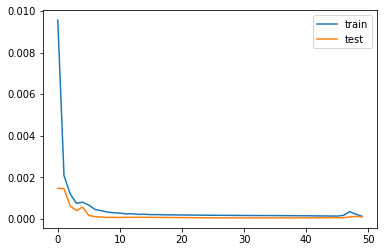

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction result on test dataset

In [211]:
y_test_predicted = model.predict(test_X2)
pred= tf.reshape(y_test_predicted, [1451, 1])
orig=tf.reshape(test_y2, [1451, 1])

inv_yhat2 = scaler_Y.inverse_transform(pred)
inv_y2 = scaler_Y.inverse_transform(orig)

46/46 [==============================] - 0s 6ms/step


#RMSE value of the model

In [212]:
rmse2 = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Test RMSE: %.4f' % rmse2)

Test RMSE: 28.2363


In [213]:
# mae of zero means there is no error or the predicted value perfectly fits the original data
mae= mean_absolute_error(inv_y2, inv_yhat2)
print('Test mae: %.4f' % mae)

Test mae: 13.2396


In [214]:
nse = 1-(np.sum(np.power((inv_y2-inv_yhat2),2))/np.sum(np.power((inv_y2-inv_y2.mean()),2)))
print('Test NSE: %.4f' % nse)

Test NSE: 0.8941


#Ploting prediction result Vs actual value

inv_y2 (OBS) max: 455.70602  versus inv_yhat2 (SIM) max: 431.1971


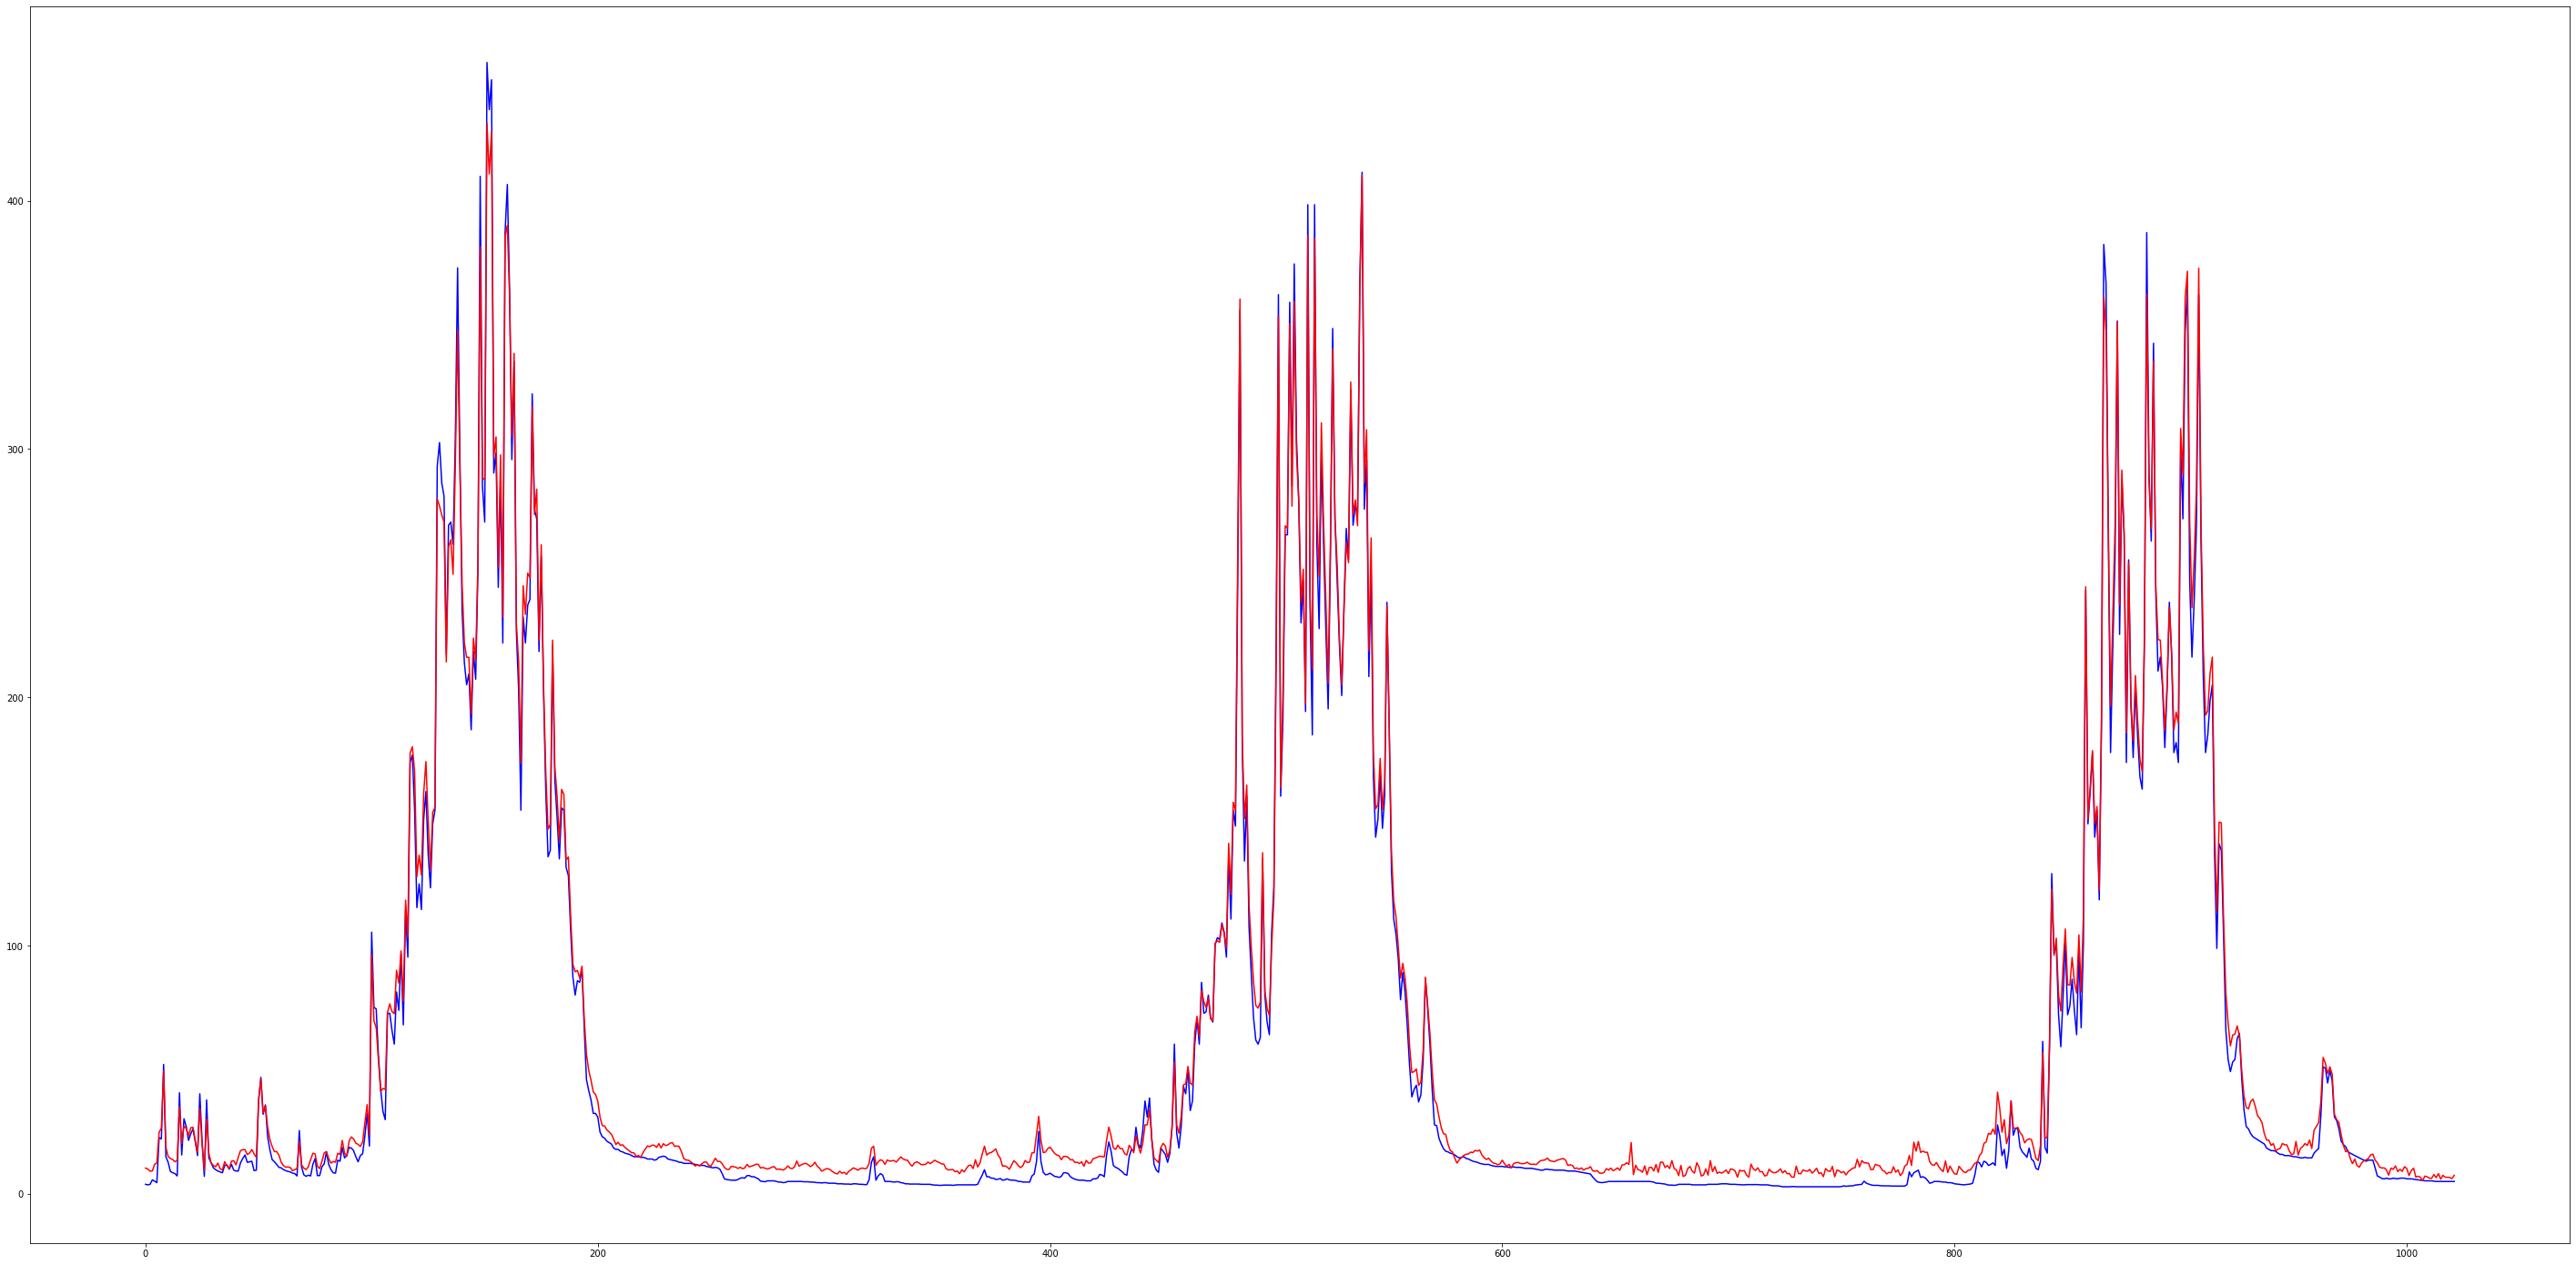

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat))
plt.figure(figsize=(50,25))
plt.plot(inv_y, color='blue')
plt.plot(inv_yhat,color='red')
plt.show()

inv_y2 (OBS) max: 455.70602  versus inv_yhat2 (SIM) max: 441.64978


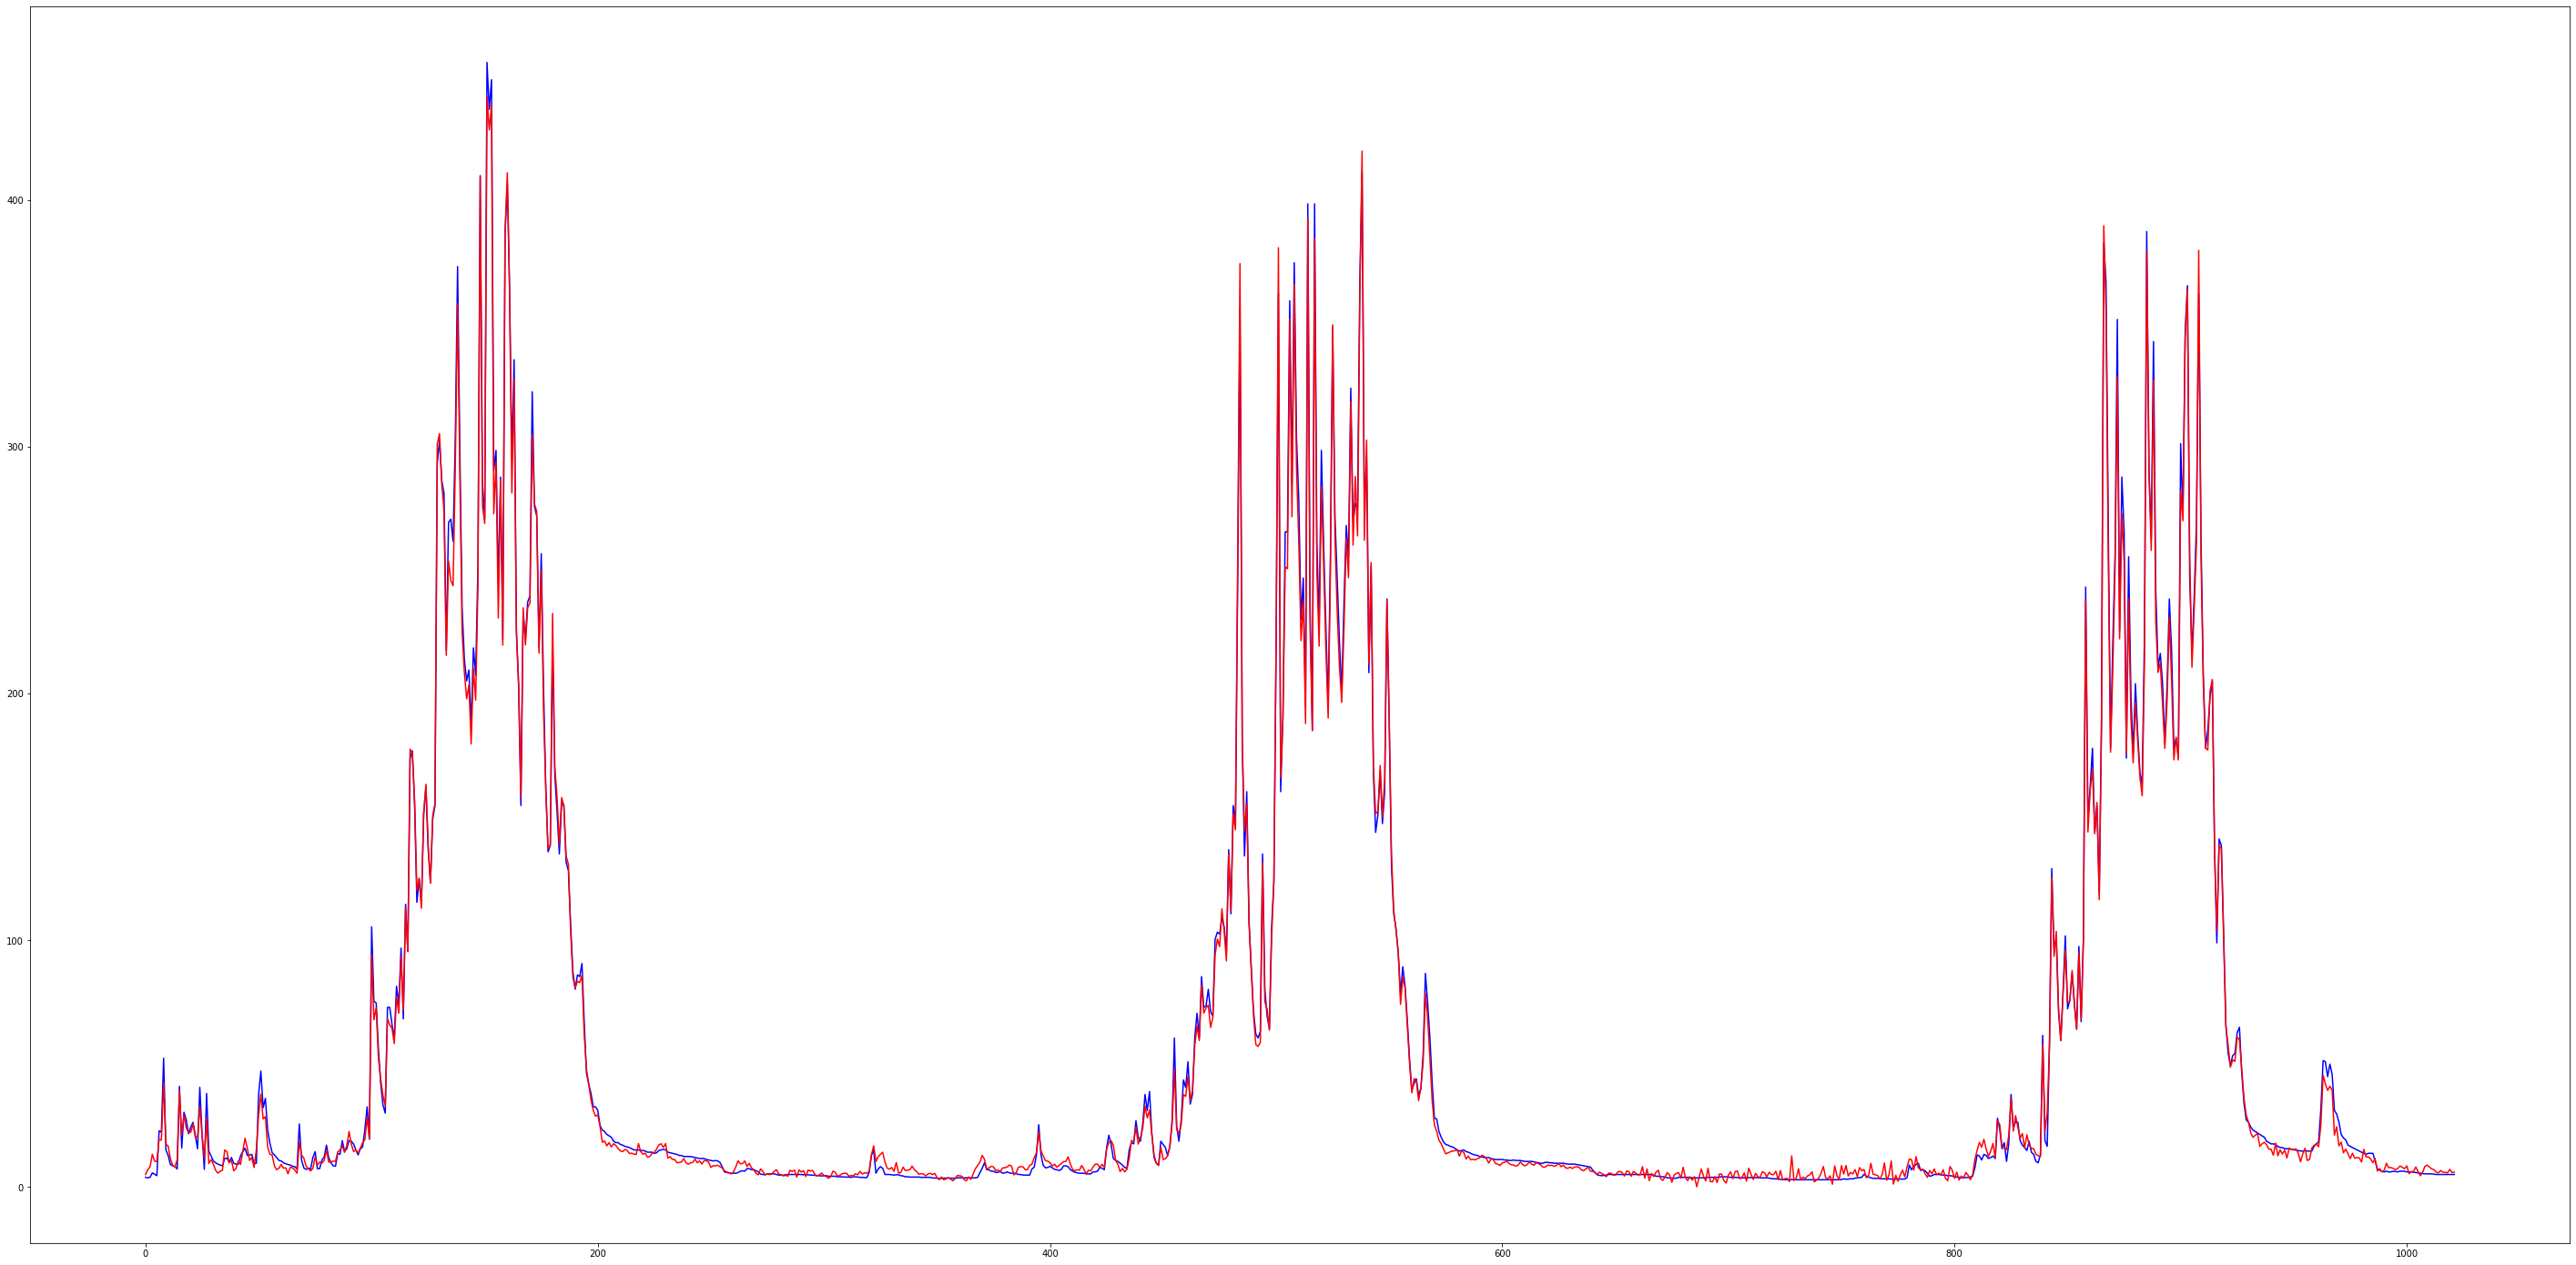

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat))
plt.figure(figsize=(50,25))
plt.plot(inv_y, color='blue')
plt.plot(inv_yhat,color='red')
plt.show()

#3. In this part an encoder-decoder model is developed where the decoder input will be the last encoder output but without being fed to a dense layer. It is Repeated based on the amount of the output sequence length (in this set up it is 1). Then the repeated encoder output will be fed as an input to the decoder at all time steps ( however for this case the time step is just 1).

In [60]:
def _create_stacked_rnn_cells():
    """
   Create a `layers_stacked_count` amount of GRU cells and stack them on top of each other.
   They have a `hidden_dim` number of neuron layer size.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
    :return: list of gru cells
    """
    cells = []
    for _ in range(2): # modifiy this one
        #cells.append(GRUCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
        cells.append(LSTMCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
    
    return cells

In [61]:
def create_hard_coded_decoder_input_model(batch_size):
  # The encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')
  encoder_lstm = RNN(cell=_create_stacked_rnn_cells(),  return_state=True)
  #encoder_lstm = LSTM(100, return_state=True,  name='encoder_lstm')
  #encoder_lstm = GRU(100, return_state=True,  name='encoder_lstm')
  encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)  # for single layer LSTM and RNN cells (both LSTM and GRU)
  #encoder_outputs, state_h = encoder_lstm(encoder_inputs) # for single layer GRU


  last_encoder_output = tf.expand_dims(encoder_outputs, axis=1)
 
  replicated_last_encoder_output = tf.repeat(
        input=last_encoder_output,
        repeats=1, # This value will be changed based on the size of the decoder output sequence length
        axis=1
    )

  states = [state_h, state_c]    # for single layer LSTM and RNN cells (both LSTM and GRU)
  #states = [state_h]            #for single layer GRU
 
  # The decoder part
  decoder_inputs = Input(shape=(1, num_output_features))
  
  decoder_lstm = RNN(cell=_create_stacked_rnn_cells(), return_sequences=True, return_state=True)
  #decoder_lstm = LSTM(100, return_sequences=True, return_state=True, name='decoder_lstm')
  #decoder_lstm = GRU(100, return_sequences=True, return_state=True, name='decoder_lstm')

  outputs, state_h, state_c = decoder_lstm(replicated_last_encoder_output, initial_state=states) # for single layer STM and RNN cells (both LSTM and GRU)
  #outputs, state_h = decoder_lstm(replicated_last_encoder_output, initial_state=states)       # for single layer GRU
  
  decoder_dense = Dense(num_output_features,  name='decoder_dense')

  # dropout = Dropout(rate=0.25)
  # outputs = dropout(outputs)

  decoder_outputs = decoder_dense(outputs)
  

  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
  return model

#By applying Bi-LSTM/GRU architecture for multivariate single-step prediction task

In [90]:
def create_hard_coded_decoder_input_model(batch_size):
  # The encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')

  #encoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
  encoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  #encoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = encoder_lstm1(encoder_inputs) # For LSTM based
  encoder_lstm1_output,forward_h1,backward_h1= encoder_lstm1(encoder_inputs) # For GRU based

  #encoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=False))
  encoder_lstm2 = Bidirectional(GRU(100,return_state=True,return_sequences=False))
  #encoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = encoder_lstm2(encoder_lstm1_output)
  encoder_lstm2_output,forward_h2,backward_h2= encoder_lstm2(encoder_lstm1_output)


  last_encoder_output = tf.expand_dims(encoder_lstm2_output, axis=1)
  
  replicated_last_encoder_output = tf.repeat(
        input=last_encoder_output,
        repeats=1, # The number of repeatitions will be dependent on the decoder output sequence length
        axis=1
    )



  #states = [forward_h2,forward_c2,backward_h2,backward_c2]
  states = [forward_h2,backward_h2]

  #The Decoder part 
  decoder_inputs=Input(shape=(1, num_output_features), name='encoder_inputs')

  decoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  #decoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))

  decoder_dense = Dense(num_output_features, activation='linear',  kernel_regularizer=regulariser, bias_regularizer=regulariser, name='decoder_dense')

  outputs, forward_state_h, backward_state_h = decoder_lstm1(replicated_last_encoder_output, initial_state=states)
  #outputs, forward_h,forward_c,backward_h,backward_c = decoder_lstm1(replicated_last_encoder_output, initial_state=states)

  
  # dropout = Dropout(rate=0.25)
  # outputs = dropout(outputs)

  decoder_outputs = decoder_dense(outputs)

  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
  return model


#Train the model

In [91]:
model=create_hard_coded_decoder_input_model(batch_size=batch_size)
#model.summary()

In [92]:
history2 = model.fit(train_X2, train_y2, epochs=50, batch_size=100, validation_data=(val_X2, val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 24s 145ms/step - loss: 0.2043 - accuracy: 2.7416e-04 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 2/50
73/73 [==============================] - 8s 108ms/step - loss: 0.0035 - accuracy: 2.7416e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 3/50
73/73 [==============================] - 8s 109ms/step - loss: 0.0026 - accuracy: 2.7416e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 4/50
73/73 [==============================] - 8s 111ms/step - loss: 0.0021 - accuracy: 4.1124e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/50
73/73 [==============================] - 8s 112ms/step - loss: 0.0019 - accuracy: 4.1124e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 6/50
73/73 [==============================] - 8s 109ms/step - loss: 0.0018 - accuracy: 4.1124e-04 - val_loss: 9.3216e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
73/73 [==============================] - 8s 110ms/step - loss: 0.0017 - accuracy: 4.

#Plotting the loss curve

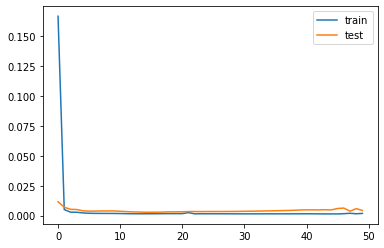

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction result on test dataset

In [93]:
y_test_predicted = model.predict(test_X2)
pred= tf.reshape(y_test_predicted, [1451, 1])
orig=tf.reshape(test_y2, [1451, 1])

inv_yhat2 = scaler_Y.inverse_transform(pred)
inv_y2 = scaler_Y.inverse_transform(orig)

46/46 [==============================] - 3s 15ms/step


#RMSE value of the model

In [97]:
rmse2 = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Test RMSE: %.4f' % rmse2)


Test RMSE: 27.4121


In [98]:
# mae of zero means there is no error or the predicted value perfectly fits the original data
mae= mean_absolute_error(inv_y2, inv_yhat2)
print('Test mae: %.4f' % mae)

Test mae: 16.6317


In [99]:
nse = 1-(np.sum(np.power((inv_y2-inv_yhat2),2))/np.sum(np.power((inv_y2-inv_y2.mean()),2)))
print('Test NSE: %.4f' % nse)

Test NSE: 0.9002


#Plot for prediction result vs actual value

inv_y2 (OBS) max: 455.706  versus inv_yhat2 (SIM) max: 313.65222


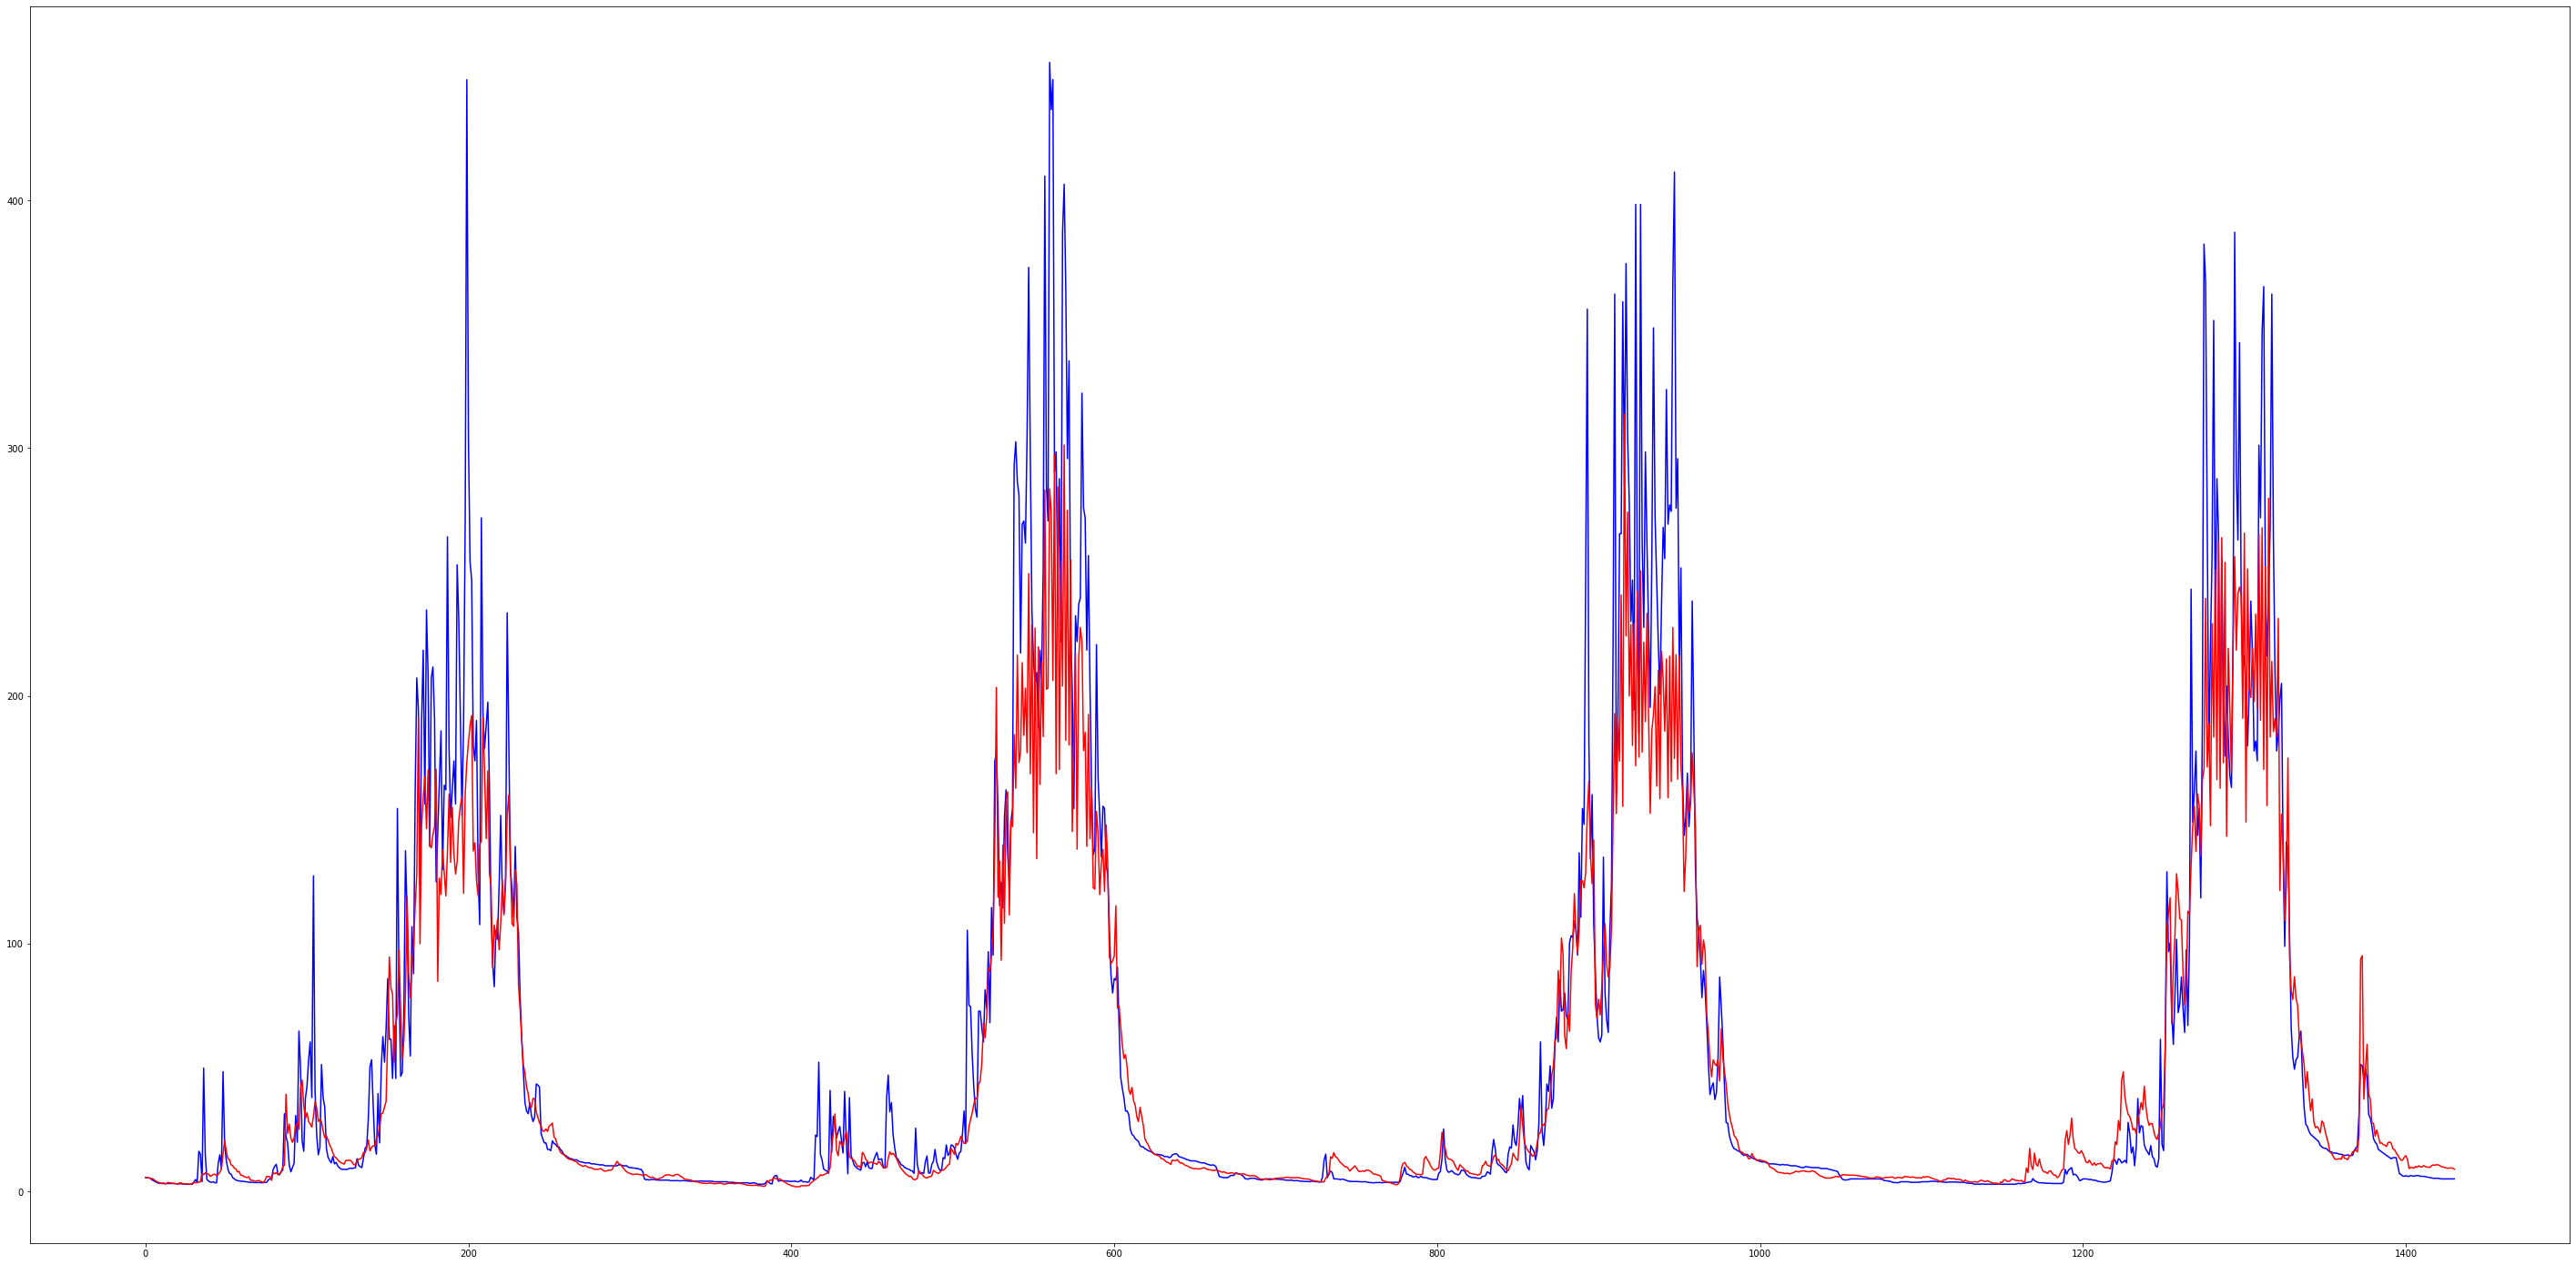

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat))
plt.figure(figsize=(50,25))
plt.plot(inv_y, color='blue')
plt.plot(inv_yhat,color='red')
plt.show()